# Importing Libraries

In [1]:
!pip install nltk
import nltk
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')  # For stop words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from PIL import Image
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from rake_nltk import Rake
from datetime import datetime
import matplotlib.dates as mdates
import torch
from collections import Counter
import itertools
from collections import defaultdict
from wordcloud import WordCloud
import os
import statsmodels.api as sm
import scipy.stats as stats
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import re
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.diagnostic import het_goldfeldquandt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.model_selection import train_test_split

# Visualization of Climate Features

## Temperature Variation

In [3]:
os.chdir("E:\\UM_Project\\Climate")

In [4]:
Nasa_Temp_land_ocean=pd.read_excel("NASA_Global_Land_Ocean_Temperature.xlsx")
Nasa_Temp_land=pd.read_csv("Temperature-Anomaly.csv")
GlobalTemp=pd.read_excel("GlobalTemp.xlsx")
Avg_Temp_Countries=pd.read_excel("Avg_Temp_Countries.xlsx")

In [5]:
# This file contain region wise average temperature data
Nasa_Temp_land.head(2)

Entity  Code  Year  Average temperature
0  Global   NaN  1850            -0.417659
1  Global   NaN  1851            -0.233350

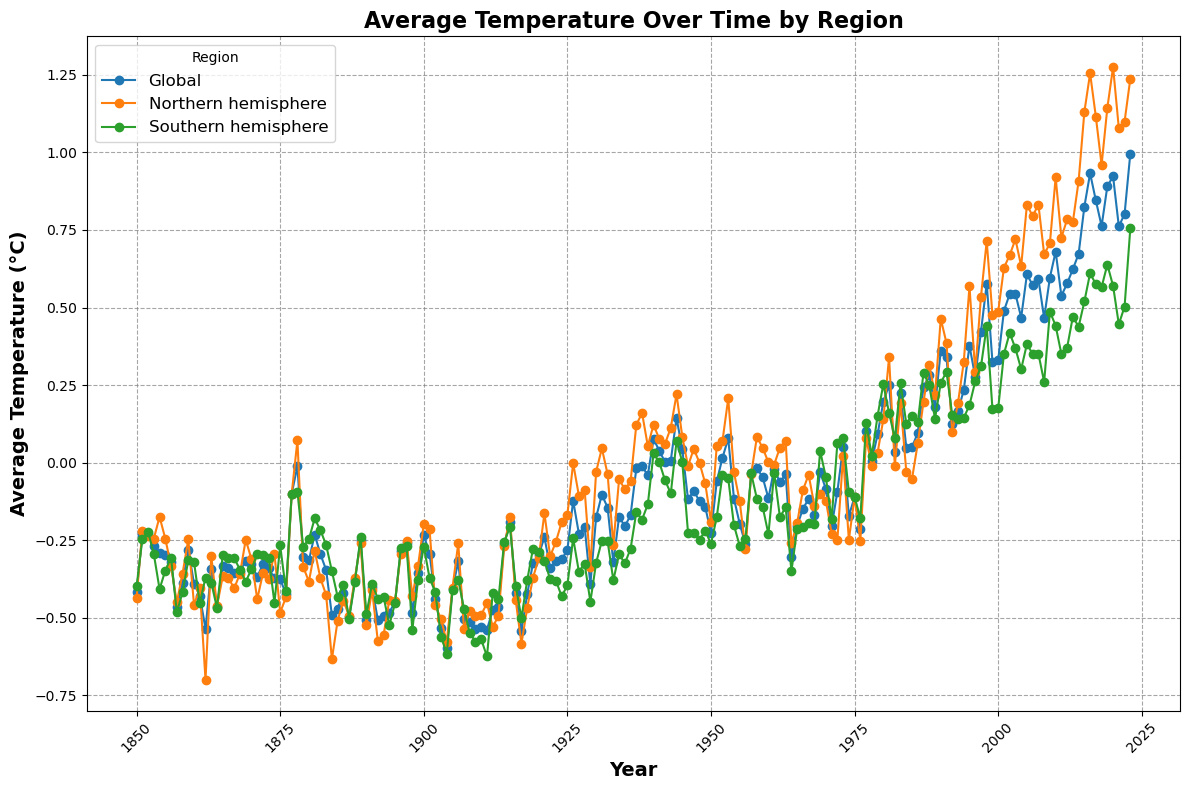

In [6]:
plt.figure(figsize=(12, 8))
# Plot each region separately
for region in Nasa_Temp_land['Entity'].unique():
    subset = Nasa_Temp_land[Nasa_Temp_land['Entity'] == region]
    plt.plot(subset['Year'], subset['Average temperature'], marker='o', label=region)
plt.title('Average Temperature Over Time by Region', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Average Temperature (°C)', fontsize=14, fontweight='bold')
plt.legend(title='Region', fontsize=12)
plt.grid(True, which='both', linestyle='--', color='grey', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


>>The graph clearly shows a general upward trend in average global, northern hemisphere, and southern hemisphere temperatures over time. This indicates a warming trend consistent with climate change

C:\Users\Ankur\AppData\Local\Temp\ipykernel_48280\3313111133.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = Nasa_Temp_land_aggregated.pivot("5-year interval", "Entity", "Average temperature")


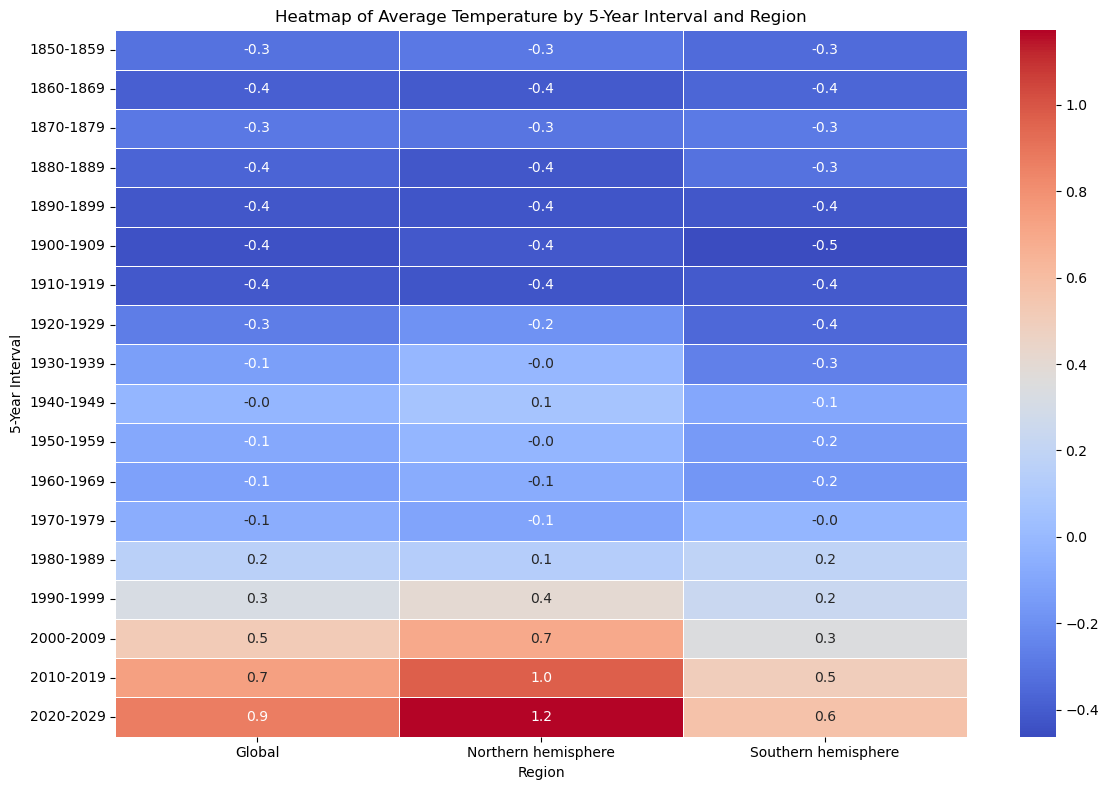

In [7]:
def get_5_year_interval(year):
    start_year = (year // 10) * 10
    end_year = start_year + 9
    return f"{start_year}-{end_year}"

# Apply the function to create a new column for 5-year intervals
Nasa_Temp_land['5-year interval'] = Nasa_Temp_land['Year'].apply(get_5_year_interval)

# Aggregate data: Compute the mean temperature for each 5-year interval and entity
Nasa_Temp_land_aggregated = Nasa_Temp_land.groupby(['5-year interval', 'Entity']).agg({'Average temperature': 'mean'}).reset_index()

# Pivot the DataFrame for the heatmap
heatmap_data = Nasa_Temp_land_aggregated.pivot("5-year interval", "Entity", "Average temperature")
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Heatmap of Average Temperature by 5-Year Interval and Region')
plt.xlabel('Region')
plt.ylabel('5-Year Interval')
plt.tight_layout()
plt.show()


>>The graph clearly shows a general upward trend in average global, northern hemisphere, and southern hemisphere temperatures over time. This indicates a warming trend consistent with climate change. While the southern hemisphere has also warmed, the rate of increase is generally lower than in the northern hemisphere.

In [8]:
# This data shows Average yearly temperature of land plus ocean
Nasa_Temp_land_ocean.head(2)

Year   No_Smoothing   Lowess(5)
0   1880          -0.17      -0.09
1   1881          -0.09      -0.13

In [9]:
Nasa_Temp_land_ocean.columns

Index(['Year ', 'No_Smoothing ', 'Lowess(5)'], dtype='object')

>Here's what each column typically represents:                                                                                 
Year: The year for which the temperature index is reported.                                                                     
No_Smoothing: This column represents the Land-Ocean Temperature Index (or temperature anomaly) calculated without any smoothing applied. It shows the raw temperature anomaly values for each year.                                                             
Lowess(5): This column represents the Land-Ocean Temperature Index (or temperature anomaly) with a Lowess smoothing applied. Lowess (Locally Weighted Scatterplot Smoothing) is a technique used to smooth data points in a scatter plot. The "(5)" indicates the span or smoothing parameter used for the Lowess technique. This column provides a smoothed version of the temperature anomaly values, which helps to identify trends by reducing the noise in the data.

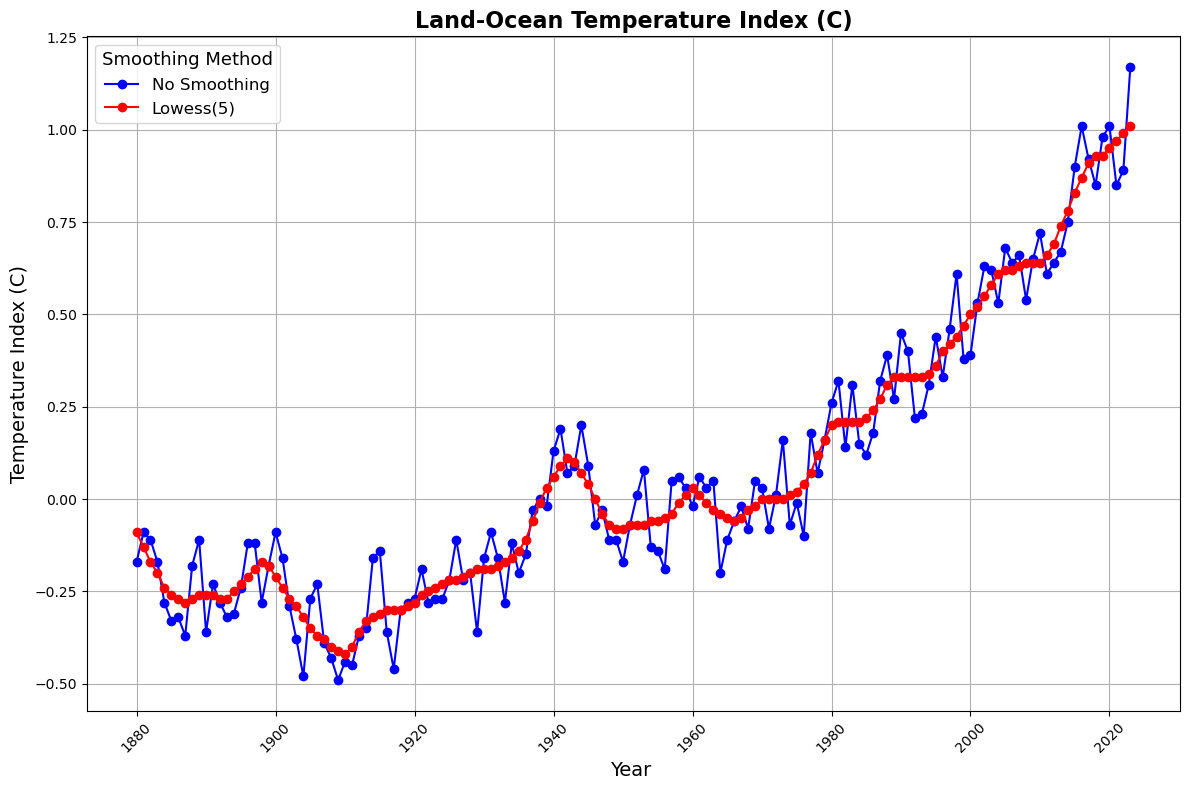

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(Nasa_Temp_land_ocean['Year '], Nasa_Temp_land_ocean['No_Smoothing '], marker='o', linestyle='-', color='blue', label='No Smoothing')
plt.plot(Nasa_Temp_land_ocean['Year '], Nasa_Temp_land_ocean['Lowess(5)'], marker='o', linestyle='-', color='red', label='Lowess(5)')

# Add titles and labels
plt.title('Land-Ocean Temperature Index (C)', fontsize=16, fontweight='bold')
plt.xlabel('Year ', fontsize=14)
plt.ylabel('Temperature Index (C)', fontsize=14)
plt.legend(title='Smoothing Method', title_fontsize='13', fontsize='12')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

>>Warming: The graph clearly shows a general upward trend in the Land-Ocean Temperature Index (LOTI) over time, indicating a warming trend.                                                                                                                 
No Smoothing: The blue line, representing the LOTI without smoothing, shows more fluctuations and variations. This is because it includes the raw data points without any adjustments.                                                                           
Lowess(5): The red line, using the Lowess smoothing method with a span of 5, provides a smoother curve. This helps to highlight the underlying trend and reduce the impact of short-term fluctuations.

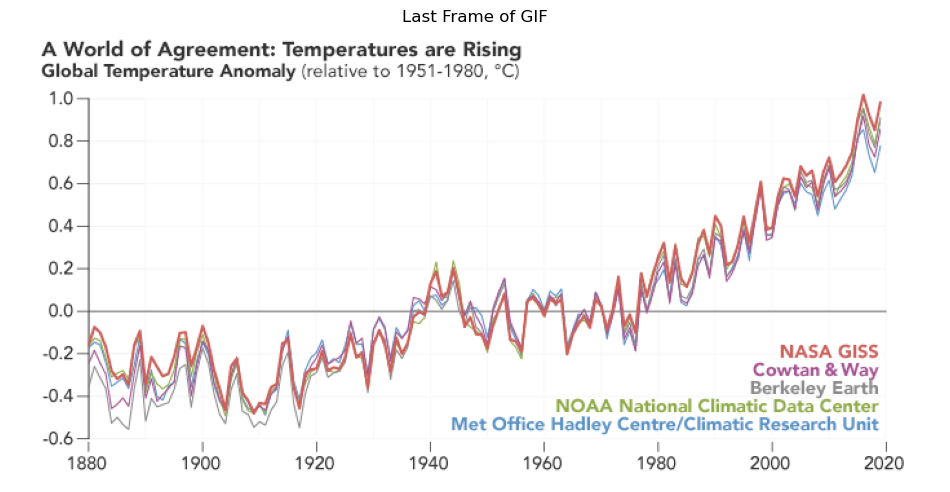

In [11]:
gif_path = "E:\\UM_Project\\Climate\\Temperature.gif"

# Open the GIF file
gif_image = Image.open(gif_path)

# Open the GIF file
with Image.open(gif_path) as gif_image:
    # Seek to the last frame
    gif_image.seek(gif_image.n_frames - 1)
    plt.figure(figsize=(12, 8))
    plt.imshow(gif_image)
    plt.axis('off')  # Hide the axis
    plt.title('Last Frame of GIF')
    plt.show()

>> The multiple datasets represented in the graph (NASA GISS, Cowtan & Way, Berkeley Earth, NOAA National Climatic Data Center, Met Office Hadley Centre/Climatic Research Unit) show a consistent upward trend, reinforcing the reliability of the data.

In [12]:
GlobalTemp.head(2)

Year  Month  Day  Anomal  y, Unc.,  Anomaly,  Unc.,  Anomal.1  y, Unc.,.1  \
0  1850      1    1  -0.788     0.390       NaN    NaN       NaN         NaN   
1  1850      2    1  -0.240     0.492       NaN    NaN       NaN         NaN   

   Anomal.2  y, Unc.,.2  Anomal.3  y, Unc.  
0       NaN         NaN       NaN      NaN  
1       NaN         NaN       NaN      NaN

> This file contains a detailed summary of the changes in Earth's global average
 surface temperature estimated by combining the Berkeley Earth land-surface
 temperature field with a reinterpolated version of the HadSST ocean temperature 
 field.  
 The current citation for this dataset is: 
 Rohde, R. A. and Hausfather, Z.: The Berkeley Earth Land/Ocean Temperature
 Record, Earth Syst. Sci. Data, 12, 3469ï¿½3479, 
 https://doi.org/10.5194/essd-12-3469-2020, 2020.
 The dataset differs slightly from the dataset as described in the citation as 
 HadSST3 has been replaced with the newer HadSST4, and associated interpolation 
 parameters have been refit accordingly.  No other changes in methods were needed 
 when moving to the new version of HadSST. 
 Two versions of this average are reported.  These differ in how they treat 
 locations with sea ice.  In the first version, temperature anomalies in the 
 presence of sea ice are extrapolated from land-surface air temperature anomalies.  
 In the second version, temperature anomalies in the presence of sea ice are
 extrapolated from sea-surface water temperature anomalies (usually collected 
 from open water areas on the periphery of the sea ice).  For most of the 
 ocean, sea-surface temperatures are similar to near-surface air temperatures; 
 however, air temperatures above sea ice can differ substantially from the water 
 below the sea ice.  The air temperature version of this average shows larger 
 changes in the recent period, in part this is because water temperature changes 
 are limited by the freezing point of ocean water.  We believe that the use of air
 temperatures above sea ice provides a more natural means of describing changes in 
 Earth's surface temperature.  
 The percent coverage of sea ice was taken from the HadISST v2 dataset and varies 
 by month and location.  In the typical month, between 3.5 and 5.5 of the 
 Earth's surface is covered with sea ice. For more information on the processing 
 and use of HadISST and HadSST refer to the description file for the combined 
 gridded data product. 
 Temperatures are in Celsius and reported as anomalies 
 relative to the Jan 1951-Dec 1980 average. Uncertainties represent the 95 confidence 
 interval for statistical and spatial undersampling effects as well as ocean biases.
 The land analysis was run on 05-Sep-2024 08:48:54
 The ocean analysis was published on 31-Aug-2024 20:02:17
 
 >The reported data is broken into two sections.  The first section reports 
 values where air temperatures were used in the presence of sea ice.  This 
 is followed by section using sea-surface temperatures in the presence of sea 
 ice.

In [13]:
GlobalTemp['Date'] = pd.to_datetime(GlobalTemp[['Year', 'Month', 'Day']])
GlobalTemp['ATSIT'] = GlobalTemp['Anomal']
GlobalTemp['STSIT'] = GlobalTemp['y, Unc.,']
GlobalTemp.head(2)

Year  Month  Day  Anomal  y, Unc.,  Anomaly,  Unc.,  Anomal.1  y, Unc.,.1  \
0  1850      1    1  -0.788     0.390       NaN    NaN       NaN         NaN   
1  1850      2    1  -0.240     0.492       NaN    NaN       NaN         NaN   

   Anomal.2  y, Unc.,.2  Anomal.3  y, Unc.       Date  ATSIT  STSIT  
0       NaN         NaN       NaN      NaN 1850-01-01 -0.788  0.390  
1       NaN         NaN       NaN      NaN 1850-02-01 -0.240  0.492

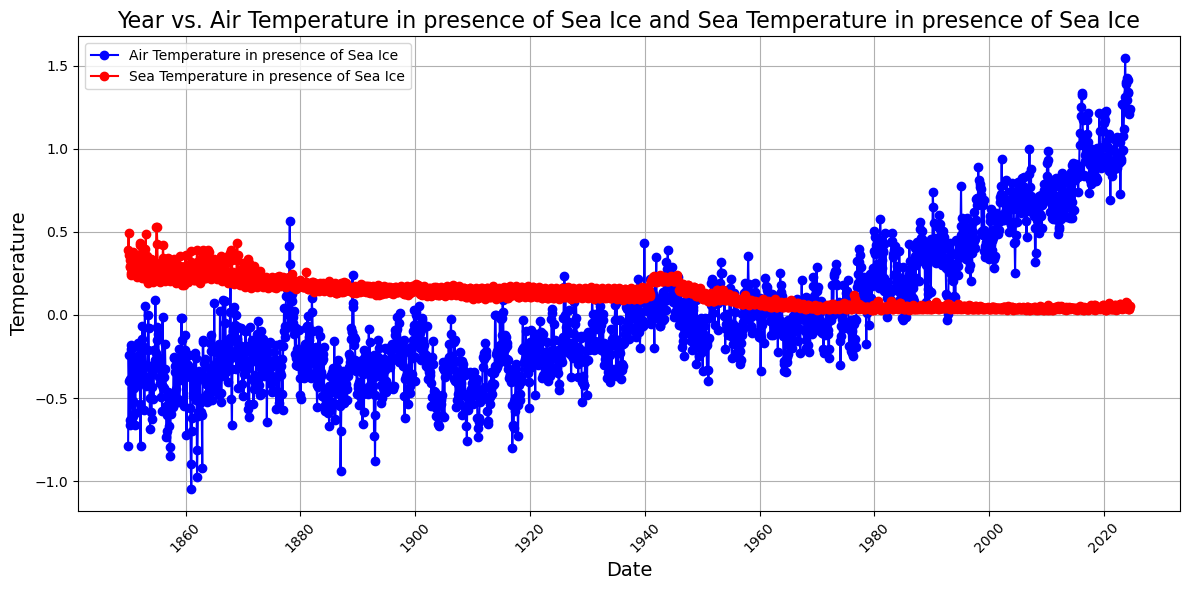

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(GlobalTemp['Date'], GlobalTemp['ATSIT'], marker='o', linestyle='-', color='b', label='Air Temperature in presence of Sea Ice')
plt.plot(GlobalTemp['Date'], GlobalTemp['STSIT'], marker='o', linestyle='-', color='r', label='Sea Temperature in presence of Sea Ice')
plt.title('Year vs. Air Temperature in presence of Sea Ice and Sea Temperature in presence of Sea Ice', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

>>The air temperature anomalies (blue line) are generally higher than the sea temperature anomalies (red line), especially in recent decades. This suggests that air temperatures above sea ice have been increasing at a faster rate than sea surface temperatures.

In [15]:
# This data give average temperature countries wise over the period
Avg_Temp_Countries.head(2)

Country  Temp2023
0  Burkina Faso     29.28
1          Mali     29.19

In [16]:
fig = px.choropleth(Avg_Temp_Countries, 
                    locations='Country',
                    locationmode='country names',
                    color='Temp2023',
                    hover_name='Country',
                    color_continuous_scale='Reds',
                    title='Average Temperature of Countries in 2023')
fig.show()


>>Tropical Regions: Countries near the equator, such as those in Africa, South America, and Southeast Asia, generally have higher average temperatures.                                                                                                   
Temperate Regions: Countries in North America, Europe, and parts of Asia exhibit a range of temperatures, with some regions experiencing warmer conditions and others experiencing cooler conditions.                                                       
Polar Regions: As expected, countries in the Arctic and Antarctic regions have the lowest average temperatures.

## Visualization of Carbon Dioxide Emissions

 Data from March 1958 through April 1974 have been obtained by C. David Keeling
 of the Scripps Institution of Oceanography (SIO) and were obtained from the
 Scripps website (scrippsco2.ucsd.edu).
 Monthly mean CO2 constructed from daily mean values.
 Scripps data downloaded from http://scrippsco2.ucsd.edu/data/atmospheric_co2
 Monthly values are corrected to center of month based on average seasonal
 cycle. Missing days can be asymmetric which would produce a high or low bias.
 Missing months have been interpolated, for NOAA data indicated by negative stdev
 and uncertainty. We have no information for SIO data about Ndays, stdv, unc
 so that they are also indicated by negative numbers
 NOTE: Due to the eruption of the Mauna Loa Volcano, measurements from Mauna Loa Observatory
 were suspended as of Nov. 29, 2022 and resumed in July 2023. 
 Observations starting from December 2022 to July 4, 2023 are from a site at the 
 Maunakea Observatories, approximately 21 miles north of the Mauna Loa Observatory.


In [17]:
Nasa_CO2=pd.read_excel("NASA_CO2_Data.xlsx")
Co_emm=pd.read_csv("2- annual-co-emissions-by-region.csv")

In [18]:
Nasa_CO2.head(2)

Year  Month  Day       Date  Decimal date  Monthly average value  \
0  1958      3    1 1958-03-01     1958.2027                 315.71   
1  1958      4    1 1958-04-01     1958.2877                 317.45   

   De-seasonalized value  #days of month  st.dev  unc. of mon mean  
0                 314.44              -1   -9.99             -0.99  
1                 315.16              -1   -9.99             -0.99

>Column Headers and Their Meanings:                                                                                             
decimal date: The decimal date format, which combines the year and fraction of the year. For example, 1958.2027 represents a specific date in the year 1958, with .2027 indicating a fraction of the year.                                                   
monthly average: The average value for the month. This column represents the average of a measurement (e.g., temperature, precipitation) for the specified month.                                                                                         
de-seasonalized: The data adjusted to remove seasonal variations. This column provides a seasonally adjusted value, which helps in analyzing underlying trends without seasonal effects.                                                                       
#days of month: The number of days in the month. This column shows how many days are in the given month, which may be used for normalization purposes.                                                                                                         
st.dev: The standard deviation. This column indicates the amount of variation or dispersion in the data for that month.         
unc. of mon mean: The uncertainty of the monthly mean. This column provides the uncertainty or error estimate associated with the monthly average value.

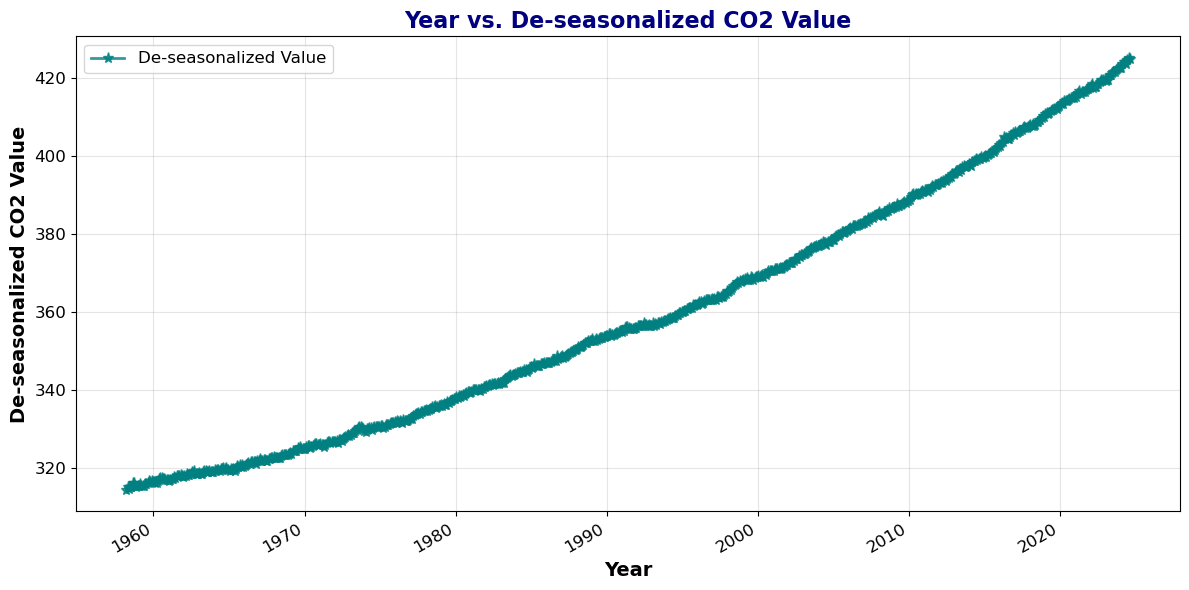

In [19]:
Nasa_CO2=pd.read_excel("NASA_CO2_Data.xlsx")

Nasa_CO2 = Nasa_CO2.set_index('Decimal date')

# Plot
plt.figure(figsize=(12, 6))  # Larger figure size for better readability

# Plot with customizations
plt.plot(Nasa_CO2.index, Nasa_CO2['De-seasonalized value'], 
         marker='*', linestyle='-', color='teal', 
         linewidth=2, markersize=8, alpha=0.8, label='De-seasonalized Value')

# Add gridlines with customization
plt.grid(True, which='both', linestyle='-', color='grey', alpha=0.2)

# Add titles and labels with font customization
plt.title('Year vs. De-seasonalized CO2 Value', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('De-seasonalized CO2 Value', fontsize=14, fontweight='bold')

plt.gcf().autofmt_xdate()  # Auto-format x-axis dates

# Rotate x-axis labels and format them for readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(fontsize=12)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


>>The graph clearly shows a steady and significant increase in de-seasonalized CO2 values over time. This indicates a long-term trend of rising atmospheric carbon dioxide concentrations.

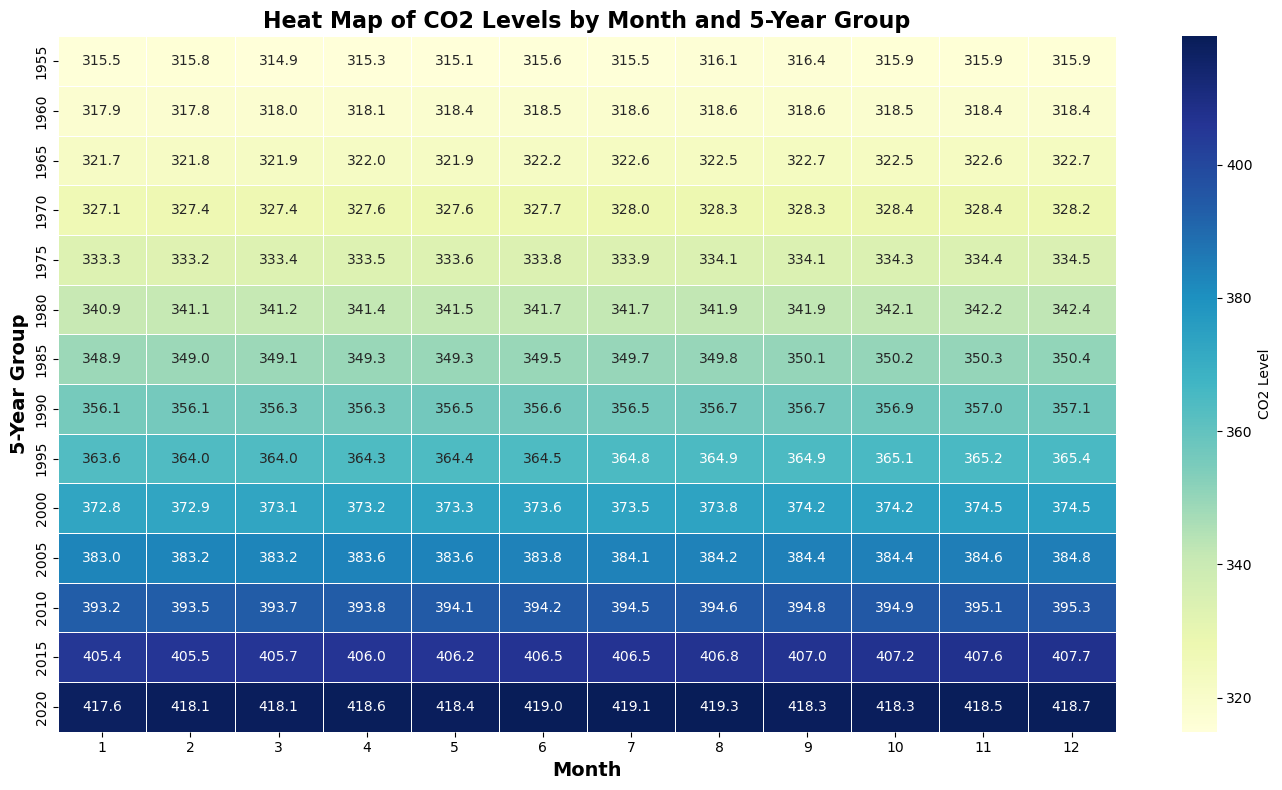

In [20]:
Nasa_CO2=pd.read_excel("NASA_CO2_Data.xlsx")

Nasa_CO2['Date'] = pd.to_datetime(Nasa_CO2['Date'])

# Extract month and year from 'Date'
Nasa_CO2['Year'] = Nasa_CO2['Date'].dt.year
Nasa_CO2['Month'] = Nasa_CO2['Date'].dt.month

# Define a function to categorize years into 5-year groups
def categorize_year(year):
    return (year // 5) * 5

# Apply the function to create a 5-year group column
Nasa_CO2['5-Year Group'] = Nasa_CO2['Year'].apply(categorize_year)

# Pivot the DataFrame to get a matrix of CO2 levels for 5-year groups
heatmap_data = Nasa_CO2.pivot_table(
    index='5-Year Group',  # Rows of the heatmap
    columns='Month',  # Columns of the heatmap
    values='De-seasonalized value',  # Values to plot
    aggfunc='mean',  # Aggregate function
    fill_value=0  # Fill missing values
)

# Plot
plt.figure(figsize=(14, 8))

# Create a heatmap
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',  # Color map
    annot=True,  # Annotate cells with the numeric value
    fmt='.1f',  # Format of the annotations
    linewidths=.5,  # Line width between cells
    cbar_kws={'label': 'CO2 Level'}  # Color bar label
)

# Titles and labels
plt.title('Heat Map of CO2 Levels by Month and 5-Year Group', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('5-Year Group', fontsize=14, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


>>The heatmap reveals a distinct seasonal pattern in CO2 levels. Concentrations tend to be higher in the late spring and early summer (April-June) and lower in the late fall and early winter (October-December). This is primarily due to seasonal variations in plant growth and respiration.

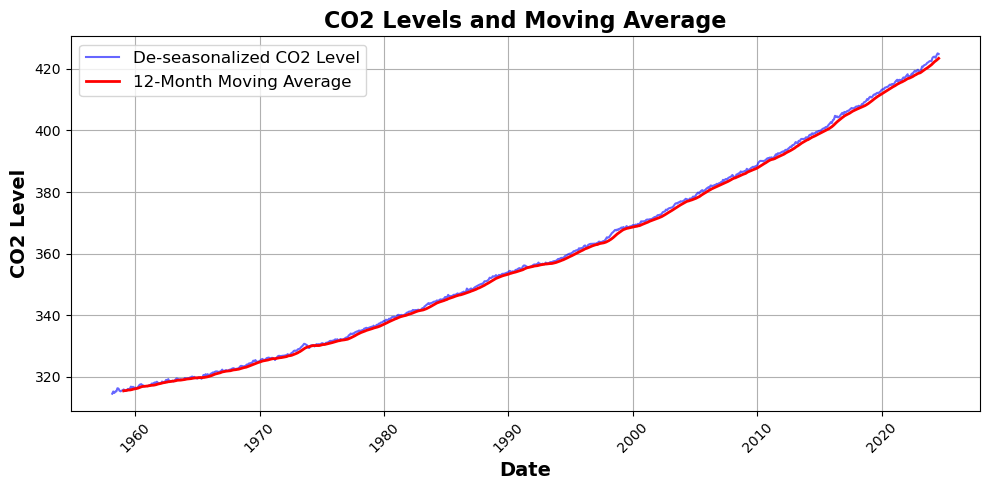

In [21]:
Nasa_CO2=pd.read_excel("NASA_CO2_Data.xlsx")

Nasa_CO2['Date'] = pd.to_datetime(Nasa_CO2['Date'])

# Set 'Date' as the index
Nasa_CO2.set_index('Date', inplace=True)

# Compute the moving average
window_size = 12  # Define the window size for the moving average
Nasa_CO2['Moving_Avg'] = Nasa_CO2['De-seasonalized value'].rolling(window=window_size, center=False).mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(Nasa_CO2.index, Nasa_CO2['De-seasonalized value'], label='De-seasonalized CO2 Level', color='blue', alpha=0.6)
plt.plot(Nasa_CO2.index, Nasa_CO2['Moving_Avg'], label=f'{window_size}-Month Moving Average', color='red', linewidth=2)

# Customize the plot
plt.title('CO2 Levels and Moving Average', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('CO2 Level', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


>>The 12-month moving average (red line) provides a smoother representation of the CO2 trend compared to the de-seasonalized CO2 levels (blue line). This helps to highlight the underlying trend and reduce the impact of short-term fluctuations.

In [22]:
# This data provide emmisiondata of carbo diioxide by each countries
Co_emm.head(2)

Entity Code  Year  Annual CO2 emissions
0  Afghanistan  AFG  1949               14656.0
1  Afghanistan  AFG  1950               84272.0

In [23]:
global_min = Co_emm['Annual CO2 emissions'].min()
global_max = Co_emm['Annual CO2 emissions'].max()

def plot_co2_emissions(year):
    data_year = Co_emm[Co_emm['Year'] == year]
    
    fig = px.choropleth(
        data_year, 
        locations='Entity',  # Column with country names
        locationmode='country names',  # Country names
        color='Annual CO2 emissions',  # Data for coloring the map
        hover_name='Entity',  # Show country name when hovering
        color_continuous_scale='Reds',  # Apply the consistent color scale
        range_color=(global_min, global_max),  # Apply the global min/max ranges
        title=f'CO2 Emissions by Country in {year}'
    )
    
    fig.show()

# Plot for 1850
plot_co2_emissions(1850)

# Plot for 2022
plot_co2_emissions(2022)


>>Concentrated in Developed Nations: The majority of CO2 emissions in 1850 appear to be concentrated in industrialized nations, particularly in Europe and North America.                                                                                       
Low Emissions in Developing Countries: Developing countries, especially in Africa and Asia, had relatively low CO2 emissions at this time.                                                                                                                     
Europe: European countries, such as the United Kingdom and France, appear to be among the largest emitters.                     
North America: The United States seems to be a significant contributor to global emissions.                                      
>>Shift Towards Asia: Compared to the 1850 map, there has been a significant shift in the distribution of CO2 emissions. China and India have become major emitters, surpassing many European and North American countries.                                   
Increased Emissions in Developing Countries: Developing countries in Asia, Africa, and South America have experienced substantial increases in CO2 emissions, reflecting their rapid industrialization and economic growth.                           
China and India: These two countries have emerged as the world's largest emitters, contributing significantly to global CO2 emissions.                                                                                                                     
United States: While still a major emitter, the United States has seen a relative decline in emissions compared to its peak.


# Visualization of Methane Emission

In [24]:
Meth=pd.read_csv("methane-emissions.csv")
Meth.columns

Index(['Entity', 'Code', 'Year',
       'Annual methane emissions in CO₂ equivalents'],
      dtype='object')

>"Annual methane emissions in CO₂ equivalents" refers to the total impact of methane emissions expressed in terms of carbon dioxide (CO₂) equivalents. This is done to standardize the effect of different greenhouse gases based on their global warming potential (GWP).
Key Points:
Greenhouse Gas Effect: Methane (CH₄) is a potent greenhouse gas, with a GWP much higher than that of CO₂. Over a 20-year period, methane is about 84 times more effective at trapping heat in the atmosphere than CO₂, and about 28 times more effective over a 100-year period.
Conversion to CO₂ Equivalents: To compare the effects of methane with CO₂, emissions of methane are converted to CO₂ equivalents using the formula:
CO₂ Equivalent
=
Amount of CH₄
×
GWP of CH₄
CO₂ Equivalent=Amount of CH₄×GWP of CH₄
Annual Total: This figure represents the total amount of methane emissions in a given year, converted to CO₂ equivalents to reflect their potential impact on global warming.

In [25]:
global_min = Meth['Annual methane emissions in CO₂ equivalents'].min()
global_max = Meth['Annual methane emissions in CO₂ equivalents'].max()

def plot_Meth_emissions(year):
    data_year = Meth[Meth['Year'] == year]
    
    fig = px.choropleth(
        data_year, 
        locations='Entity',  # Column with country names
        locationmode='country names',  # Country names
        color='Annual methane emissions in CO₂ equivalents',  # Data for coloring the map
        hover_name='Entity',  # Show country name when hovering
        color_continuous_scale='Reds',  # Apply the consistent color scale
        range_color=(global_min, global_max),  # Apply the global min/max ranges
        title=f'Methane Emissions by Country in {year}'
    )
    
    fig.show()

# Plot for 1850
plot_Meth_emissions(1850)

# Plot for 2022
plot_Meth_emissions(2022)


>> Almost similar sift in all regions

In [26]:
Meth.head()

Entity Code  Year  Annual methane emissions in CO₂ equivalents
0  Afghanistan  AFG  1850                                    3594926.5
1  Afghanistan  AFG  1851                                    3615134.5
2  Afghanistan  AFG  1852                                    3635346.8
3  Afghanistan  AFG  1853                                    3655563.5
4  Afghanistan  AFG  1854                                    3675785.0

In [27]:
Meth = Meth.drop(columns=['Entity', 'Code'])

# Aggregate data by 'Year' and sum the emissions (assuming summing is the desired operation)
aggregated_Meth = Meth.groupby('Year').sum().reset_index()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


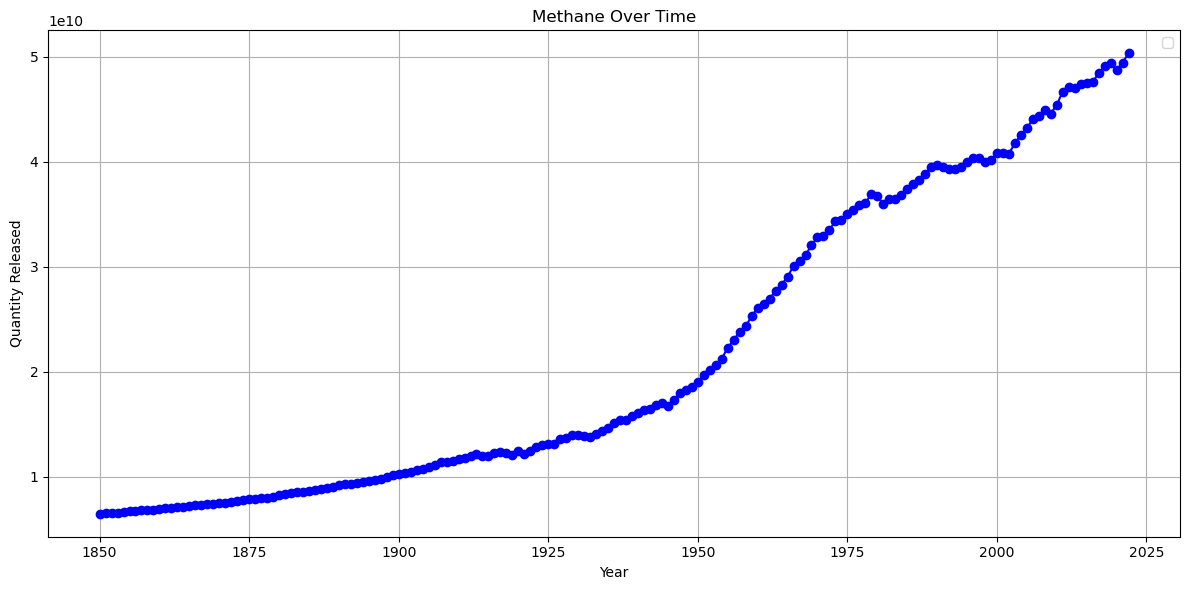

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(aggregated_Meth['Year'], aggregated_Meth['Annual methane emissions in CO₂ equivalents'], marker='o', linestyle='-', color='b')
plt.title('Methane Over Time')
plt.xlabel('Year')
plt.ylabel('Quantity Released')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


>>The graph clearly shows a steady and significant increase in methane emissions over time. This indicates a long-term trend of rising atmospheric methane concentrations.

## Visualization of Antarctica Ice Mass

 Antarctica Mass

 Data from the GRACE and GRACE-FO JPL RL06.1Mv3 Mascon Solution

 This file contains values that are anomalies relative to April 2002 computed at the Jet Propulsion Laboratory under the
 auspices of the NASA MEaSUREs program. The Greenland mass anomalies are generated using GRACE and GRACE-FO data from the JPL RL06.1Mv3
 Mascon Solution (https://podaac.jpl.nasa.gov/dataset/TELLUS_GRACE_MASCON_CRI_GRID_RL06.1_V3).

 Antarctic Mass Trend (04/2002 - 04/2024): -139.12 +/-39.00 Gt/yr 

 If you use these data please cite:
 Wiese, D. N., D.-N. Yuan, C. Boening, F. W. Landerer, and M. M. Watkins (2022) JPL GRACE and GRACE-FO Mascon Ocean, Ice, and Hydrology Equivalent
 Water Height RL06.1M CRI Filtered Version 3.0, Ver. 3.0, PO.DAAC, CA, USA. Dataset accessed [YYYY-MM-DD] at http://dx.doi.org/10.5067/TEMSC-3MJ62.

 For information on how the data were generated please refer to:
 Watkins, M. M., D. N. Wiese, D. -N. Yuan, C. Boening, and F. W. Landerer (2015), Improved methods for observing Earth's time variable
 mass distribution with GRACE using spherical cap mascons, J. Geophys. Res. Solid Earth, 120, 2648_2671, doi: 10.1002/2014JB011547.


In [29]:
Nasa_Sea_Ice=pd.read_excel("NASA_IceSheet_Data.xlsx")
Nasa_Sea_Ice.head(2)

HDR Hea  der_End----  -----------------------------------
0  2002.29         0.00                               178.90
1  2002.35         0.94                               102.47

 column description
 1 TIME (year.decimal)
 2 Antarctic mass (Gigatonnes)
 2 Antarctic mass 1-sigma uncertainty (Gigatonnes)

In [30]:
# Rename columns
Nasa_Sea_Ice.rename(columns={
    'HDR Hea': 'TIME (year.decimal)',
    'der_End----': 'Antarctic Mass (Gigatonnes)',
    '-----------------------------------': 'Antarctic Mass Uncertainty (Gigatonnes)'
}, inplace=True)
Nasa_Sea_Ice.head(2)


TIME (year.decimal)  Antarctic Mass (Gigatonnes)  \
0              2002.29                         0.00   
1              2002.35                         0.94   

   Antarctic Mass Uncertainty (Gigatonnes)  
0                                   178.90  
1                                   102.47

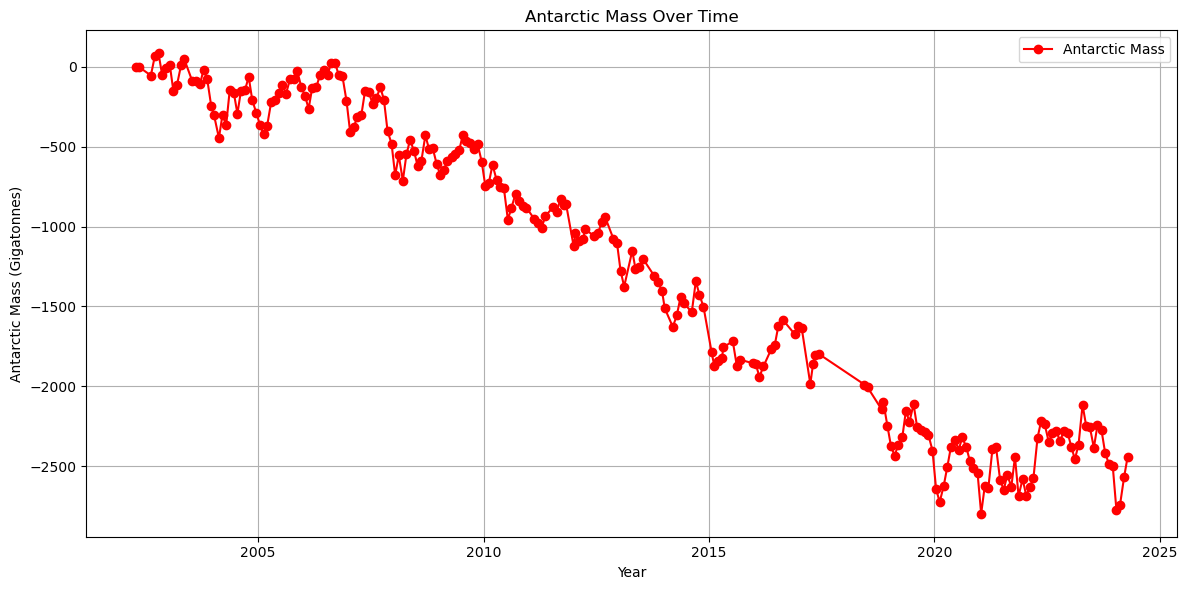

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(Nasa_Sea_Ice['TIME (year.decimal)'], Nasa_Sea_Ice['Antarctic Mass (Gigatonnes)'], marker='o', linestyle='-', color='r', label='Antarctic Mass')
plt.title('Antarctic Mass Over Time')
plt.xlabel('Year')
plt.ylabel('Antarctic Mass (Gigatonnes)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


>>The graph clearly shows a general downward trend in Antarctic mass over time, indicating a loss of ice mass in the Antarctic region.                                                                                                                         
The loss of Antarctic ice contributes to sea level rise, affecting coastal communities and ecosystems worldwide.               
The decline in Antarctic mass is a clear indicator of climate change and its impacts on polar regions.                         
Changes in Antarctic ice mass can influence ocean circulation patterns, which can have far-reaching effects on global climate systems.

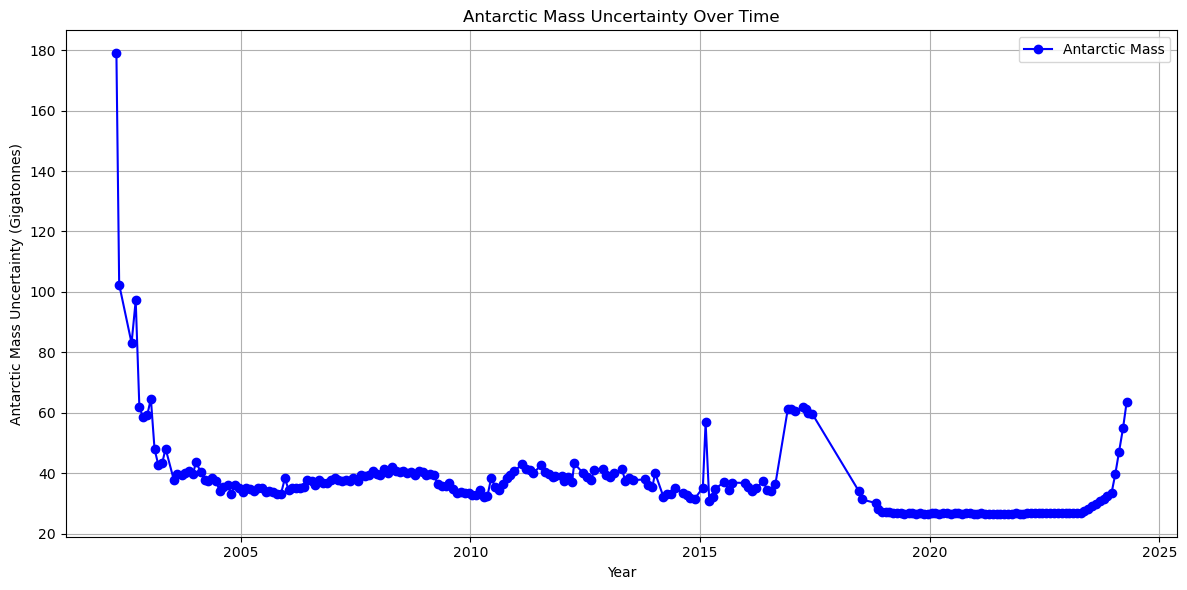

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(Nasa_Sea_Ice['TIME (year.decimal)'], Nasa_Sea_Ice['Antarctic Mass Uncertainty (Gigatonnes)'], marker='o', linestyle='-', color='b', label='Antarctic Mass')
plt.title('Antarctic Mass Uncertainty Over Time')
plt.xlabel('Year')
plt.ylabel('Antarctic Mass Uncertainty (Gigatonnes)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

>>The graph shows significant fluctuations in the uncertainty associated with Antarctic mass measurements over time. This indicates that the precision and accuracy of these measurements have varied.

## Visualization of Sea Level Rise

In [33]:
NASA_Sea_level=pd.read_excel("NASA_SeaLevel_Data.xlsx")

 Global Mean Sea Level Data
 
 Temporal Coverage: September 1992 - January 2024

 This file contains Global Mean Sea Level (GMSL) variations computed at the NASA Goddard Space Flight Center under the 
 auspices of the NASA Sea Level Change program. The GMSL was generated using the Integrated Multi-Mission Ocean Altimeter Data for Climate Research (http://podaac.jpl.nasa.gov/dataset/MERGED_TP_J1_OSTM_OST_ALL_V51). It combines Sea Surface Heights from the TOPEX/Poseidon, Jason-1, OSTM/Jason-2, Jason-3, and Sentinel-6 Michael Freilich missions to a common terrestrial reference frame with all inter-mission biases, range and geophysical corrections applied and placed onto a georeferenced orbit.  This creates a consistent data record throughout time, regardless of the instrument used.  Note, the most recent estimates of GMSL (post March 28, 2022) derived from the Sentinel-6 Michael Freilich mission are preliminary as validation and reprocessing procedures for Sentinel-6 are ongoing.

 column description 
 1 altimeter type 0=dual-frequency  999=single frequency (ie Poseidon-1) 
 2 merged file cycle # 
 3 year+fraction of year (mid-cycle) 
 4 number of observations 
 5 number of weighted observations 
 6 GMSL (Global Isostatic Adjustment (GIA) not applied) variation (mm) with respect to 20-year TOPEX/Jason collinear mean reference 
 7 standard deviation of GMSL (GIA not applied) variation estimate (mm)
 8 smoothed (60-day Gaussian type filter) GMSL (GIA not applied) variation (mm)  
 9 GMSL (Global Isostatic Adjustment (GIA) applied) variation (mm) with respect to 20-year TOPEX/Jason collinear mean reference 
 10 standard deviation of GMSL (GIA applied) variation estimate (mm)
 11 smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm)
 12 smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm); annual and semi-annual signal removed
 13 smoothed (60-day Gaussian type filter) GMSL (GIA not applied) variation (mm); annual and semi-annual signal removed
 

In [34]:
NASA_Sea_level.head(2)

Head         col1    col2       col3   col4   col5   col6   col7   col8  \
0    11  1993.011526  466881  338409.69 -37.91  89.01 -37.67 -37.90  89.01   
1    12  1993.038692  459563  333609.59 -40.95  89.95 -39.07 -40.94  89.95   

    col9  col10  col11  
0 -37.66 -37.64 -37.66  
1 -39.06 -38.53 -38.55

In [35]:
# Rename columns
NASA_Sea_level.rename(columns={
    'col1': 'Decimal Year',
    'col2': 'Obsevations',
    'col3': 'Weighted Observations',
    'col4': 'GMSL (GIA Not Applied) Variation',
    'col5': 'Standard Deviation of GMSL (GIA Not Applied)',
    'col6': 'Smoothed GMSL (GIA Not Applied) Variation',
    'col7': 'GMSL (GIA Applied) Variation',
    'col8': 'Standard Deviation of GMSL (GIA Applied)',
    'col9': 'Smoothed GMSL (GIA Applied) Variation',
    'col10': 'Smoothed GMSL (GIA Applied), Annual and Semi-Annual Signal Removed ',
    'col11': 'Smoothed GMSL (GIA Not Applied), Annual and Semi-Annual Signal Removed'
    
}, inplace=True)
NASA_Sea_level.head(2)


Head  Decimal Year  Obsevations  Weighted Observations  \
0    11   1993.011526       466881              338409.69   
1    12   1993.038692       459563              333609.59   

   GMSL (GIA Not Applied) Variation  \
0                            -37.91   
1                            -40.95   

   Standard Deviation of GMSL (GIA Not Applied)  \
0                                         89.01   
1                                         89.95   

   Smoothed GMSL (GIA Not Applied) Variation  GMSL (GIA Applied) Variation  \
0                                     -37.67                        -37.90   
1                                     -39.07                        -40.94   

   Standard Deviation of GMSL (GIA Applied)  \
0                                     89.01   
1                                     89.95   

   Smoothed GMSL (GIA Applied) Variation  \
0                                 -37.66   
1                                 -39.06   

   Smoothed GMSL (GIA Applied), Annual and Semi-Annual Signal Removed   \
0                                             -37.64                     
1                                             -38.53                     

   Smoothed GMSL (GIA Not Applied), Annual and Semi-Annual Signal Removed  
0                                             -37.66                       
1                                             -38.55

>GMSL (GIA Applied) Variation: This column gives the Global Mean Sea Level variation adjusted for Global Isostatic Adjustment (GIA), which is typically the most accurate representation for studying long-term trends in sea level.                         
Smoothed GMSL (GIA Applied) Variation: For a clearer view of the trends, especially if you want to present a smoother variation with annual and semi-annual signals removed.

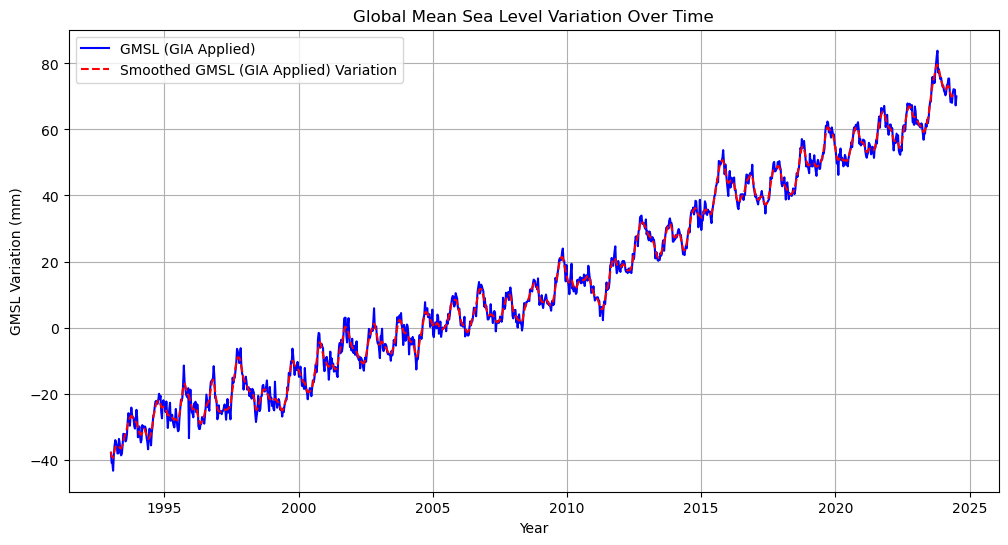

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(NASA_Sea_level['Decimal Year'], NASA_Sea_level['GMSL (GIA Applied) Variation'], label='GMSL (GIA Applied)', color='blue')
plt.plot(NASA_Sea_level['Decimal Year'], NASA_Sea_level['Smoothed GMSL (GIA Applied) Variation'], label='Smoothed GMSL (GIA Applied) Variation', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('GMSL Variation (mm)')
plt.title('Global Mean Sea Level Variation Over Time')
plt.legend()
plt.grid(True)
plt.show()

>>The graph clearly shows a general upward trend in global mean sea level (GMSL) over time, indicating a rise in sea levels.   
GMSL (GIA Applied): The blue line represents the raw GMSL data with glacial isostatic adjustment (GIA) applied. This adjusts the data for the effects of post-glacial rebound, which can cause regional variations in sea level.                                 
Smoothed GMSL (GIA Applied) Variation: The red line represents a smoothed version of the GMSL data, which helps to highlight the overall trend and reduce the impact of short-term fluctuations.

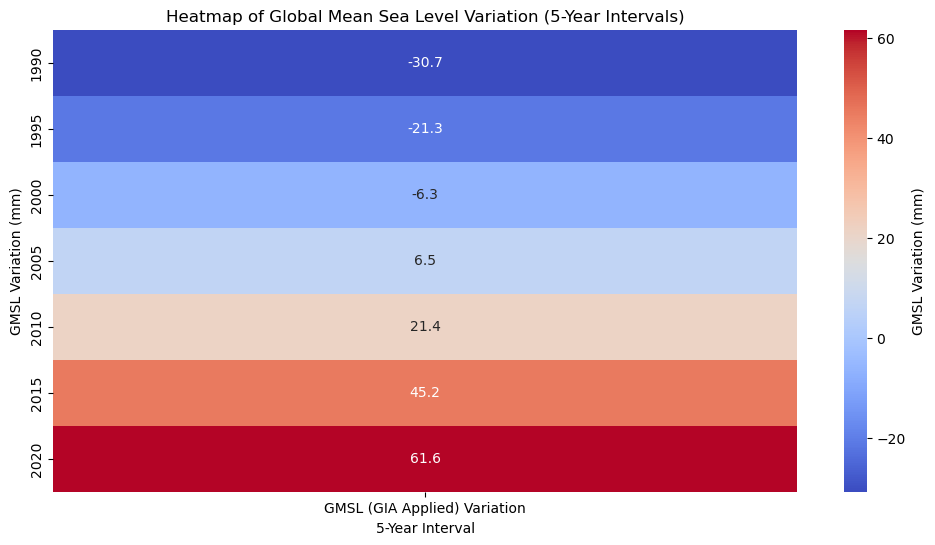

In [37]:
NASA_Sea_level['5-Year Interval'] = (NASA_Sea_level['Decimal Year'] // 5 * 5).astype(int)
NASA_Sea_level_heatmap = NASA_Sea_level.pivot_table(index='5-Year Interval', values='GMSL (GIA Applied) Variation', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(NASA_Sea_level_heatmap, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'GMSL Variation (mm)'})
plt.xlabel('5-Year Interval')
plt.ylabel('GMSL Variation (mm)')
plt.title('Heatmap of Global Mean Sea Level Variation (5-Year Intervals)')
plt.show()

>>The heatmap clearly shows a general upward trend in global mean sea level (GMSL) variation over time. The colors representing higher sea level rise become more prevalent in the later 5-year intervals.

## Visualization Ocean Acidification

In [38]:
Acid=pd.read_csv("CSVExport.csv")
Acid.head(3)

date   - values   - uncertainties
0  1985-06-30   8.109708          0.002421
1  1986-06-30   8.108819          0.002409
2  1987-06-30   8.106887          0.002204

In [39]:
Acid.columns

Index(['date', ' - values', ' - uncertainties'], dtype='object')

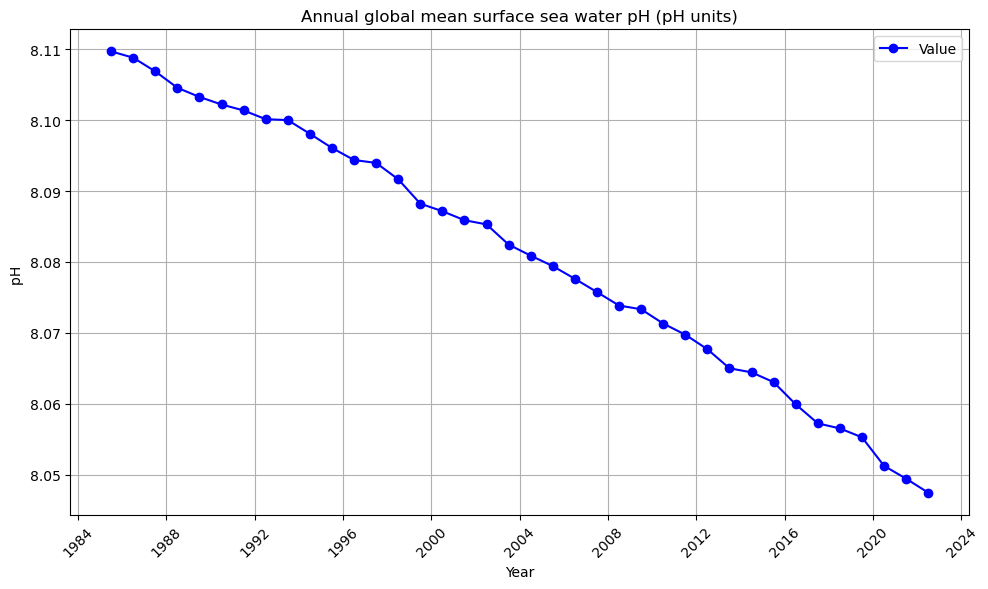

In [40]:
# Convert 'date' column to datetime format
Acid['date'] = pd.to_datetime(Acid['date'])

# Plotting Date vs Value
plt.figure(figsize=(10, 6))
plt.plot(Acid['date'], Acid[' - values'], marker='o', linestyle='-', color='b', label='Value')

# Adding labels and title
plt.title('Annual global mean surface sea water pH (pH units)')
plt.xlabel('Year')
plt.ylabel('pH ')
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.legend()
plt.tight_layout()
plt.show()


>>The graph clearly shows a general downward trend in the annual global mean surface seawater pH over time. This indicates a decrease in ocean pH, which is known as ocean acidification, which is caused by the absorption of carbon dioxide from the atmosphere

## Visualization of Heat Wave


>Data source: NOAA, 2024                                                                                                        Web update: June 2024                                                                                                           Units: number of heat waves; length of heat waves (days); length of heat wave season (days); °F				


>Frequency (average number of heat waves per year)	Duration (average number of individual heat waves)	Season (average length of annual heat wave season)	Intensity (average temperature above local threshold during heat waves)


In [41]:
Heat_wave=pd.read_csv("heat_waves_fig-1.csv")
Heat_wave.head()

Decade  Frequency  Duration  Season  Intensity
0  1960-1970      2.172  3.003418  23.750   1.949738
1  1970-1980      2.842  3.206548  33.970   2.063236
2  1980-1990      3.216  3.299760  38.810   2.153360
3  1990-2000      3.956  3.466631  47.512   2.250610
4  2000-2010      4.668  3.654336  53.498   2.297838

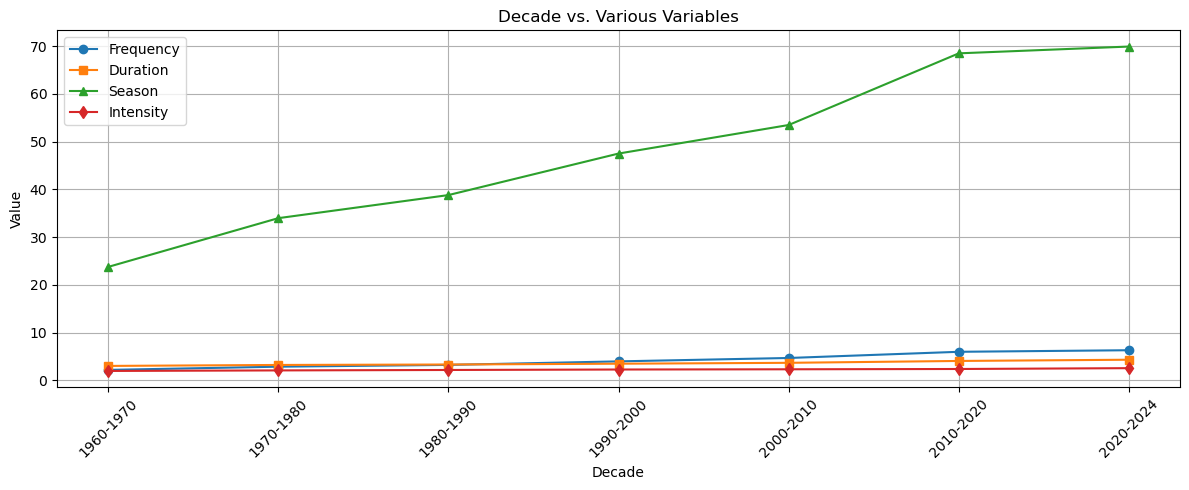

In [42]:
plt.figure(figsize=(12, 5))

# Plot each variable
plt.plot(Heat_wave['Decade'], Heat_wave['Frequency'], marker='o', label='Frequency')
plt.plot(Heat_wave['Decade'], Heat_wave['Duration'], marker='s', label='Duration')
plt.plot(Heat_wave['Decade'], Heat_wave['Season'], marker='^', label='Season')
plt.plot(Heat_wave['Decade'], Heat_wave['Intensity'], marker='d', label='Intensity')

# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Value')
plt.title('Decade vs. Various Variables')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


>>The graph shows a clear upward trend in both frequency and intensity over time. This suggests that the occurrence and severity of heat wave have been increasing in recent decades.

## Visualization of Extreme Weather Events / Disasters

In [43]:
c1=pd.read_csv("events-CCR-1980-2024_c1.csv")
c2=pd.read_csv("events-ENCCR-1980-2024_c2.csv")
c3=pd.read_csv("events-GCS-1980-2024_c3.csv")
c4=pd.read_csv("events-GLS-1980-2024_c4.csv")
c5=pd.read_csv("events-NECR-1980-2024_c5.csv")
c6=pd.read_csv("events-NWCR-1980-2024_c6.csv")
c7=pd.read_csv("events-SCR-1980-2024_c7.csv")
c8=pd.read_csv("events-SECR-1980-2024_c8.csv")
c9=pd.read_csv("events-SP-1980-2024_c9.csv")
c10=pd.read_csv("events-SWCR-1980-2024_c10.csv")
c11=pd.read_csv("events-WCR-1980-2024_c11.csv")
c12=pd.read_csv("events-WNCCR-1980-2024_c12.csv")

In [44]:
merged_Dis = pd.concat([c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12], ignore_index=True)
merged_Dis.to_csv("E:\\UM_Project\\Climate\\merged_Dis.csv", index=False)

In [45]:
merged_Dis.columns

Index(['Name', 'Region', 'Disaster', 'Begin Date', 'End Date',
       'CPI-Adjusted Cost', 'Unadjusted Cost', 'Deaths'],
      dtype='object')

In [46]:
print(merged_Dis['Region'].unique())

['Central Climate Region' 'East North Central Climate Region'
 'Gulf coasts States' 'Great Lakes States' 'NorthEast Climate Region'
 'NorthWest Climate Region' 'South Climate Region'
 'SouthEast Climate Region' 'Southern Plains' 'SouthWest Climate Region'
 'West Climate Region' 'West North Central Climate Region']


In [47]:
print(merged_Dis['Disaster'].unique())

['Drought' 'Winter Storm' 'Severe Storm' 'Freeze' 'Flooding'
 'Tropical Cyclone' 'Wildfire']


In [48]:
merged_Dis.head()

Name                  Region  \
0  Central/Eastern Drought/Heat Wave (Summer-Fall...  Central Climate Region   
1  Midwest/Southeast/Northeast Winter Storm, Cold...  Central Climate Region   
2    Midwest/Plains/Southeast Tornadoes (April 1982)  Central Climate Region   
3                          Severe Storms (June 1982)  Central Climate Region   
4                    Southeast Drought (Summer 1983)  Central Climate Region   

       Disaster  Begin Date  End Date  CPI-Adjusted Cost  Unadjusted Cost  \
0       Drought    19800601  19801130            40480.8          10020.0   
1  Winter Storm    19820108  19820116             2211.1            662.0   
2  Severe Storm    19820402  19820404             1599.5            483.2   
3  Severe Storm    19820531  19820610             1574.2            479.9   
4       Drought    19830601  19830831             9544.4           2964.1   

   Deaths  
0    1260  
1      85  
2      33  
3      30  
4       0

In [49]:
merged_Dis['Year'] = merged_Dis['Begin Date'].astype(str).str[:4].astype(int)


Text(0, 0.5, 'Count')

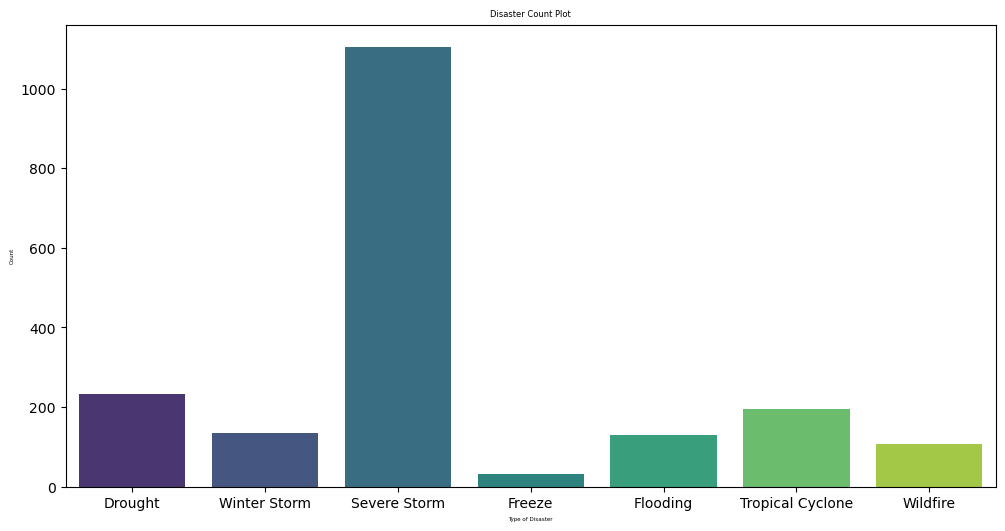

In [50]:
# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Disaster', data=merged_Dis, palette='viridis')  # You can change the palette as needed

# Add titles and labels
plt.title('Disaster Count Plot', fontsize=6)
plt.xlabel('Type of Disaster', fontsize=4)
plt.ylabel('Count', fontsize=4)

>>Severe Storm: The plot clearly shows that severe storms are the most prevalent disaster type, with a significantly higher count compared to other categories.                                                                                             
Drought and Winter Storm: Drought and winter storms have relatively higher frequencies compared to freeze, flooding, tropical cyclones, and wildfires.                                                                                                       
Lower Frequency Disasters: Freeze, flooding, tropical cyclones, and wildfires have lower counts, indicating less frequent occurrences.

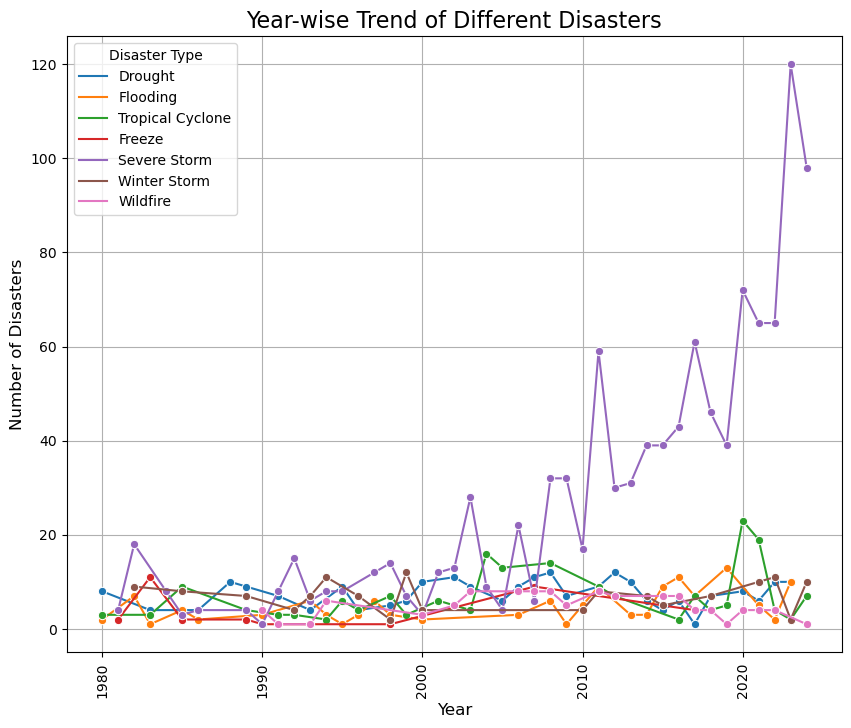

In [51]:
merged_Dis_count = merged_Dis.groupby(['Year', 'Disaster']).size().reset_index(name='Count')
plt.figure(figsize=(10, 8))

# Plot with seaborn's lineplot function
sns.lineplot(data=merged_Dis_count, x='Year', y='Count', hue='Disaster', marker='o')

# Add titles and labels
plt.title('Year-wise Trend of Different Disasters', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Disasters', fontsize=12)
plt.grid(True)
plt.xticks(rotation=90)
plt.legend(title='Disaster Type')

# Show plot
plt.show()


>>The graph shows a general upward trend in the frequency of most disaster types over time, indicating an increase in the occurrence of these events.

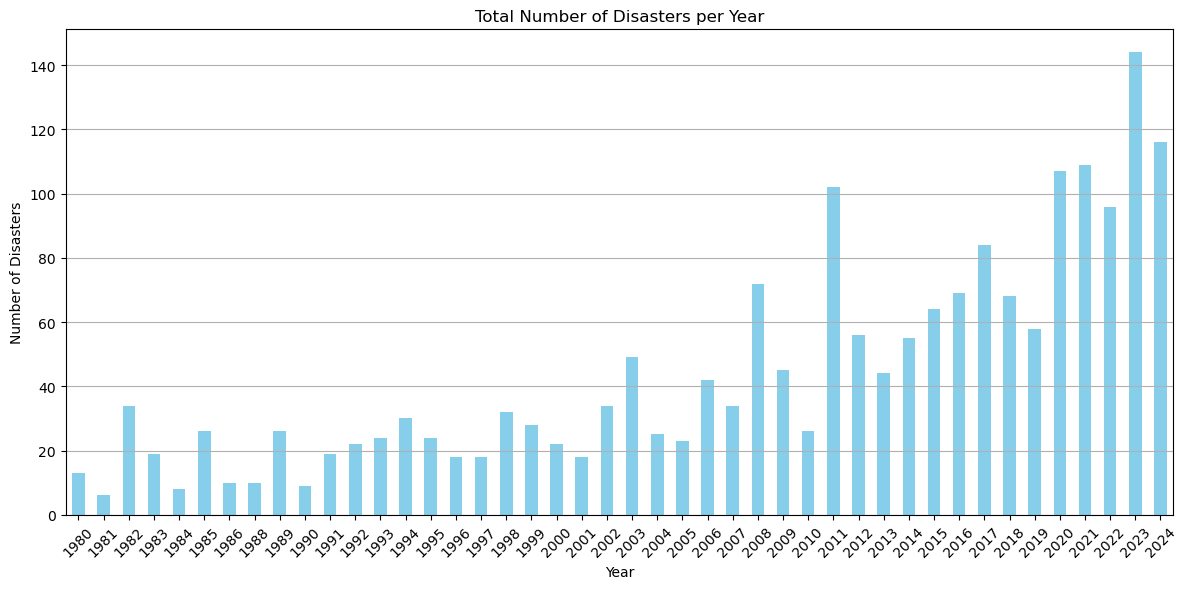

In [52]:
disasters_per_year = merged_Dis['Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
disasters_per_year.plot(kind='bar', color='skyblue')
plt.title('Total Number of Disasters per Year')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

>>The increasing number of disasters is linked to climate change, as changing climate patterns can influence the occurrence and severity of various events.

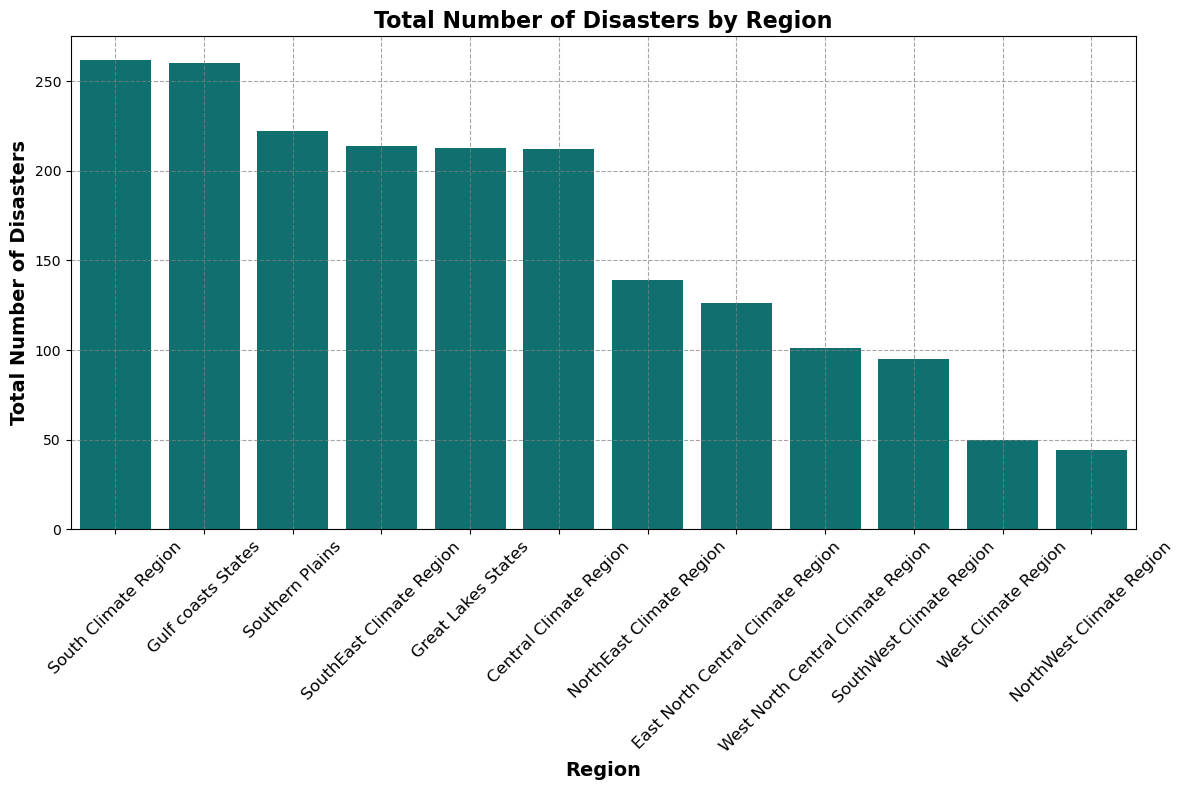

In [53]:
disasters_by_region = merged_Dis['Region'].value_counts().reset_index()
disasters_by_region.columns = ['Region', 'Total Disasters']

# Plotting the total number of disasters by region
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Total Disasters', data=disasters_by_region, color='teal')

# Adding titles and labels
plt.title('Total Number of Disasters by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14, fontweight='bold')
plt.ylabel('Total Number of Disasters', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', color='grey', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()


>>South Central Climate Region: This region experiences the highest number of disasters, significantly surpassing other regions. 
Gulf Coast States: The Gulf Coast States also face a relatively high number of disasters.                                       
Lower Disaster Regions: Regions like the West Climate Region and Northwest Climate Region have significantly lower numbers of disasters.

## NASA Comment's Semantic Analysis

In [54]:
NASA_comment=pd.read_csv("climate_nasa (1).csv")
NASA_comment.head(3)

date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...

 >Column Descriptors
 1. Date: The date and time when the comment was posted.
 2. LikesCount: The number of likes each comment received.
 3. ProfileName: The anonymized name of the user who posted the comment.
 4. CommentsCount: The number of responses each comment received.
 5. Text: The actual text content of the comment.

In [55]:
NASA_comment = pd.DataFrame(NASA_comment)
NASA_comment['date'] = pd.to_datetime(NASA_comment['date'], format="%Y-%m-%dT%H:%M:%S.%fZ")
NASA_comment['date'] = NASA_comment['date'].dt.strftime('%d/%m/%Y')
NASA_comment.head(3)

date  likesCount                                        profileName  \
0  07/09/2022           2  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...   
1  08/09/2022           0  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...   
2  07/09/2022           1  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...   

   commentsCount                                               text  
0            NaN  Neat comparison I have not heard it before.\n ...  
1            NaN  An excellent way to visualise the invisible! T...  
2            3.0  Does the CO2/ghg in the troposphere affect the...

In [56]:
NASA_comment['commentsCount'] = pd.to_numeric(NASA_comment['commentsCount'], errors='coerce')  # Convert non-numeric to NaN
NASA_comment['commentsCount'].fillna(0, inplace=True)  # Replace NaN with 0
NASA_comment.head(3)

date  likesCount                                        profileName  \
0  07/09/2022           2  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...   
1  08/09/2022           0  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...   
2  07/09/2022           1  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...   

   commentsCount                                               text  
0            0.0  Neat comparison I have not heard it before.\n ...  
1            0.0  An excellent way to visualise the invisible! T...  
2            3.0  Does the CO2/ghg in the troposphere affect the...

In [57]:
correlation = NASA_comment['likesCount'].corr(NASA_comment['commentsCount'])
print(f'Correlation between Likes and Comments: {correlation}')


Correlation between Likes and Comments: 0.41683162530485174


In [58]:
NASA_comment['text'] = NASA_comment['text'].astype(str)
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))  # Get stop words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return ' '.join(tokens)

NASA_comment['processed_text'] = NASA_comment['text'].apply(preprocess_text)

In [59]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
# Fit and transform the text data
X = vectorizer.fit_transform(NASA_comment['processed_text'])

In [60]:
# Apply sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)
NASA_comment['sentiment'] = NASA_comment['text'].apply(get_sentiment)

In [61]:
# Initialize LDA model
lda = LatentDirichletAllocation(n_components=20, random_state=42)  # Adjust n_components based on your needs
lda.fit(X)
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic #0:
['going', 'theyre', 'future', 'ya', 'aware', 'temperatures', 'metaphor', 'agree', 'happen', 'happened']
Topic #1:
['jimmy', 'schulz', 'neutralize', 'oil', 'save', 'global', 'weather', 'climate', 'drink', 'fault']
Topic #2:
['cycles', 'vb', 'jim', 'right', 'climate', 'us', 'bye', 'global', 'due', 'change']
Topic #3:
['download', 'warming', 'age', 'data', 'one', 'back', 'oooooohotoooooobad', 'hot', 'ice', 'fake']
Topic #4:
['data', 'called', 'facts', 'agree', 'space', 'human', 'httpswwwbarnesandnoblecomwthegreatclimatechangedebateandymay1141019734', 'interesting', 'climate', 'change']
Topic #5:
['earth', 'get', 'linear', 'agw', 'em', 'people', 'going', 'start', 'change', 'climate']
Topic #6:
['never', 'earths', 'trolls', 'singh', 'sukhwinder', 'climate', 'dear', 'denialists', 'unfortunatelly', 'httpswwwfacebookcomreel3246160055626064']
Topic #7:
['something', 'graph', 'going', 'carbon', 'change', 'lower', 'dont', 'mean', 'years', 'real']
Topic #8:
['nasa', 'vamos', 'pariba', 't

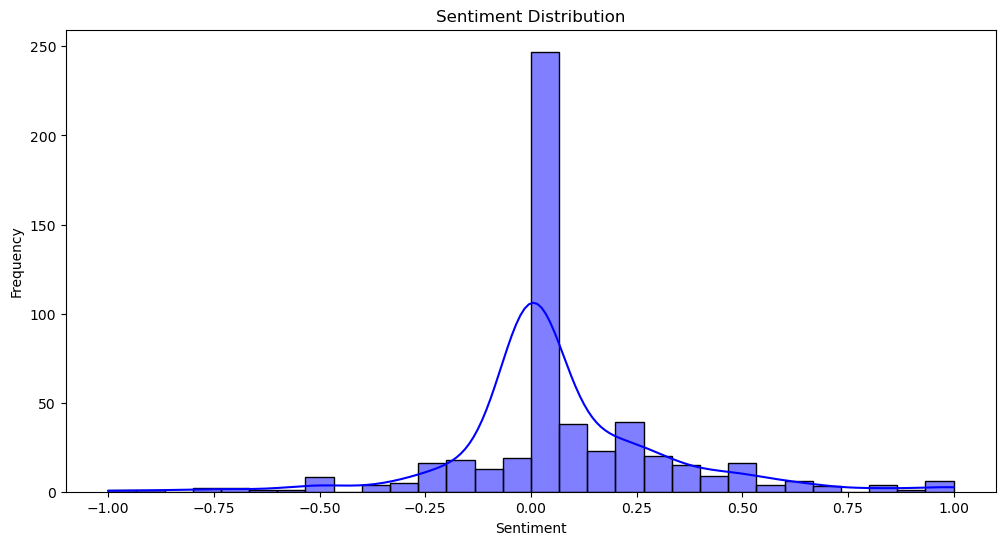

In [62]:
plt.figure(figsize=(12, 6))
sns.histplot(NASA_comment['sentiment'], kde=True, bins=30, color='blue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

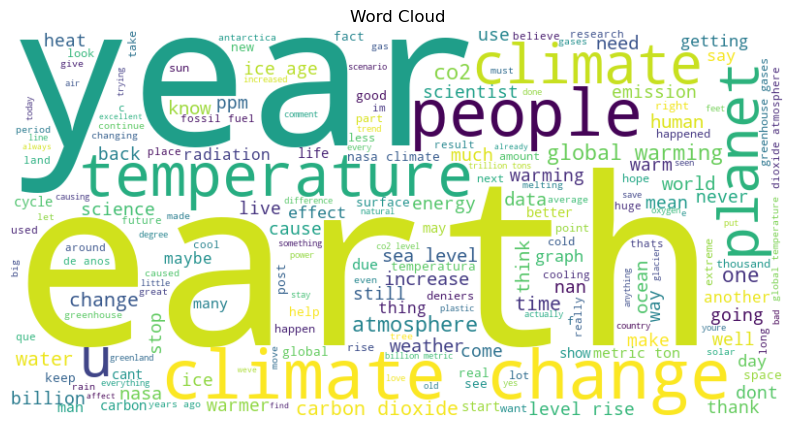

In [63]:
text = ' '.join(NASA_comment['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [64]:
compiled_text = ' '.join(NASA_comment['text'].tolist())
print(compiled_text)

Neat comparison I have not heard it before.
 I would say that CO2 is like a disco ball so energy and collide with countless molecules as it bounces around in our atmosphere. An excellent way to visualise the invisible! Thanks Does the CO2/ghg in the troposphere affect the stratosphere? Being warmer the troposphere must be expanding? excellent post! I defo feel the difference - one i can drink and the other makes me feel sick. Yes, and carbon dioxide does not harm the Earth like you people are making it out to be. Fake climate change rhetoric, as usual. Excellent example...very relatable to the Gen Pop. Complex topics...explained in understandable ways. 👍⚡ I am so proud of whoever created this content. Please feel very very good about yourself today Has the Earth ever had a concentration of over 1000 ppm? Yes, and not even half a cup later that poor soul is gonna know it too. Historical co2 data would make it an interesting post why the northern hemisphere warm more than the southern he

In [65]:
# Define climate-related keywords
climate_keywords = [
    # General Climate Terms
    "climate", "climate change", "global warming", "climate crisis", "climate emergency", "climate action", 
    "climate mitigation", "climate adaptation", "climate resilience", "climate policy", "climate justice", 
    "climate science", "climate impacts", "weather patterns", "carbon cycle","global",
    # Greenhouse Gases & Emissions
    "greenhouse gases", "CO2", "carbon dioxide", "methane", "CH₄", "nitrous oxide", 
    "N₂O", "fluorinated gases", "emissions", "carbon emissions", "GHGs", 
    "carbon footprint", "fossil fuels", "carbon sequestration", "carbon offset", 
    "carbon neutral", "carbon capture", "decarbonization",
    # Renewable Energy & Energy Sources
    "renewable energy", "solar energy", "wind energy", "hydropower", "geothermal energy", 
    "biomass energy", "tidal energy", "clean energy", "green energy", "sustainable energy", 
    "energy efficiency", "low carbon energy", "energy transition", "electrification", 
    "carbon-free energy",
    # Pollution & Environmental Impact
    "pollution", "air pollution", "water pollution", "environmental impact", "acid rain", 
    "industrial pollution", "deforestation", "land degradation", "habitat loss", 
    "erosion", "overfishing", "land use change", "urbanization", "oil spills", 
    "plastic pollution",
    # Temperature & Atmosphere
    "global temperature rise", "sea surface temperature", "heatwaves", "temperature anomalies", 
    "ocean acidification", "arctic amplification", "polar ice melt", "ice caps", 
    "glacier retreat", "permafrost thawing", "rising temperatures", "stratospheric warming", 
    "troposphere", "jet stream shifts", "climate models","temperature",
    # Extreme Weather & Natural Disasters
    "extreme weather", "hurricanes", "typhoons", "cyclones", "storm surges", "flooding", 
    "droughts", "wildfires", "desertification", "torrential rain", "blizzards", 
    "snowstorms", "landslides", "flash floods",
    # Biodiversity & Ecosystems
    "biodiversity loss", "ecosystem collapse", "species extinction", "coral bleaching", 
    "ocean ecosystems", "habitat fragmentation", "wildlife migration", "forest ecosystems", 
    "wetlands", "marine biodiversity", "coastal erosion", "mangrove forests", 
    "tundra", "rainforests", "biodiversity hotspots",
    # Sea-Level Rise & Ocean
    "sea-level rise", "coastal erosion", "ocean warming", "melting ice sheets", 
    "glacial melting", "antarctic ice melt", "arctic ice loss", "saltwater intrusion", 
    "ocean currents", "ocean circulation", "thermal expansion", "sea ice extent", 
    "storm surge", "floodplain", "coastal flooding",
    # Sustainable Practices & Solutions
    "sustainable development", "green technology", "reforestation", "afforestation", 
    "agroforestry", "sustainable agriculture", "regenerative agriculture", 
    "permaculture", "organic farming", "circular economy", "zero waste", "conservation", 
    "environmental stewardship", "green infrastructure", "ecosystem restoration",
    # International Agreements & Policies
    "paris agreement", "kyoto protocol", "COP", "conference of the parties", 
    "UNFCCC", "IPCC", "intergovernmental panel on climate change", "carbon tax", 
    "emission trading systems", "clean power plan", "renewable energy targets", 
    "nationally determined contributions", "NDCs", "global carbon budget", "climate financing", 
    "sustainable development goals", "SDGs", "biodiversity conservation", 
    "environmental regulation",
    # Human Health & Climate
    "climate-related health risks", "heat stress", "vector-borne diseases", 
    "malaria spread", "respiratory issues", "airborne diseases", "waterborne diseases", 
    "heat mortality", "zoonotic diseases", "public health crises", "food insecurity", 
    "water scarcity", "climate displacement", "refugee migration", "mental health impacts",
    # Socio-Economic Impacts
    "climate inequality", "environmental refugees", "climate-induced migration", 
    "food security", "water security", "loss of livelihoods", "economic impact", 
    "agriculture disruption", "fisheries decline", "infrastructure damage", "insurance risk", 
    "property damage", "supply chain disruption", "energy shortages", 
    "global conflict over resources"
]


# Function to check if comment contains any climate-related keywords
def is_climate_related(text):
    return any(keyword in text.lower() for keyword in climate_keywords)

# Apply function
NASA_comment['is_climate_related'] = NASA_comment['text'].apply(is_climate_related)

# Output DataFrame with climate-related comments
print(NASA_comment[['text', 'is_climate_related']])


                                                  text  is_climate_related
0    Neat comparison I have not heard it before.\n ...               False
1    An excellent way to visualise the invisible! T...               False
2    Does the CO2/ghg in the troposphere affect the...                True
3    excellent post! I defo feel the difference - o...               False
4    Yes, and carbon dioxide does not harm the Eart...                True
..                                                 ...                 ...
517                     One can only hope for a peak 😞               False
518  what is the error margin for the temperature e...                True
519  We all should volenteerly help in reducing Glo...                True
520                                       Sergio Yepes               False
521  We're experiencing severe, abnormal weather pa...                True

[522 rows x 2 columns]


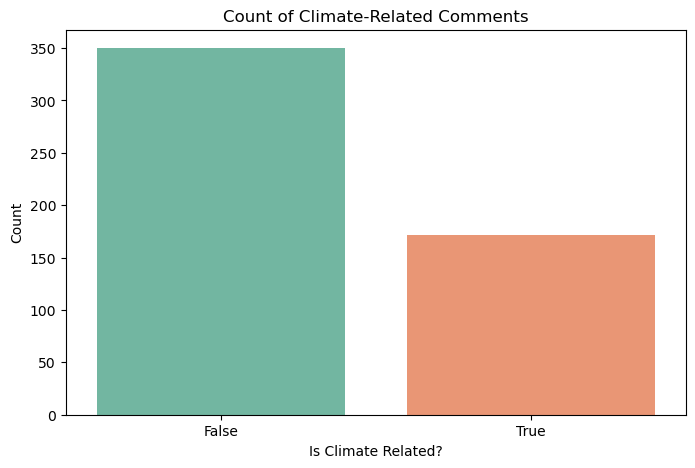

In [66]:
plt.figure(figsize=(8, 5))
sns.countplot(data=NASA_comment, x='is_climate_related', palette='Set2')
plt.title('Count of Climate-Related Comments')
plt.xlabel('Is Climate Related?')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.show()

## Twitter dataset Semantic Analysis

In [67]:
Twitter=pd.read_csv("The Climate Change Twitter Dataset.csv")
# https://www.kaggle.com/datasets/deffro/the-climate-change-twitter-dataset

In [68]:
Twitter.shape

(15789411, 10)

In [69]:
Twitter.head(3)

created_at     id        lng        lat             topic  \
0  2006-06-06 16:06:42+00:00   6132        NaN        NaN  Weather Extremes   
1  2006-07-23 21:52:30+00:00  13275 -73.949582  40.650104  Weather Extremes   
2  2006-08-29 01:52:30+00:00  23160        NaN        NaN  Weather Extremes   

   sentiment   stance     gender  temperature_avg aggressiveness  
0  -0.097180  neutral     female              NaN     aggressive  
1   0.575777  neutral  undefined        -1.114768     aggressive  
2   0.500479  neutral       male              NaN     aggressive

C:\Users\Ankur\AppData\Local\Temp\ipykernel_48280\1539455394.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

C:\Users\Ankur\AppData\Local\Temp\ipykernel_48280\1539455394.py:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



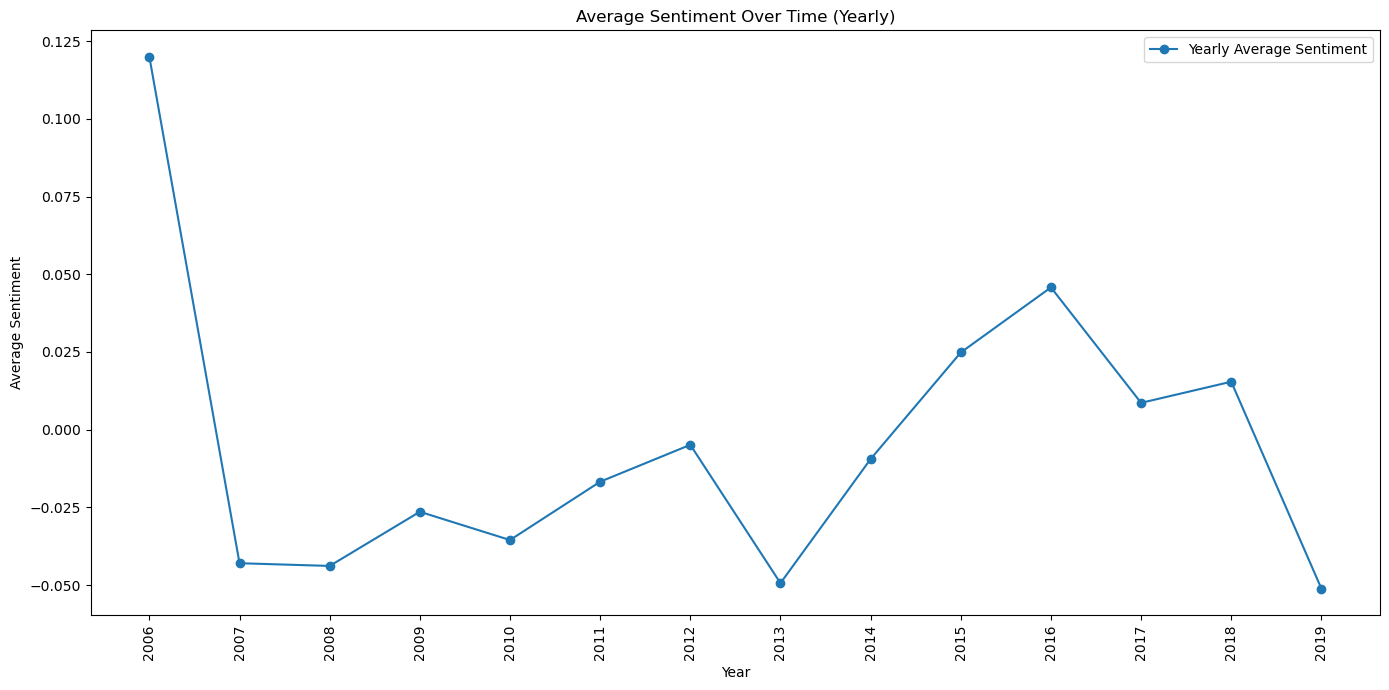

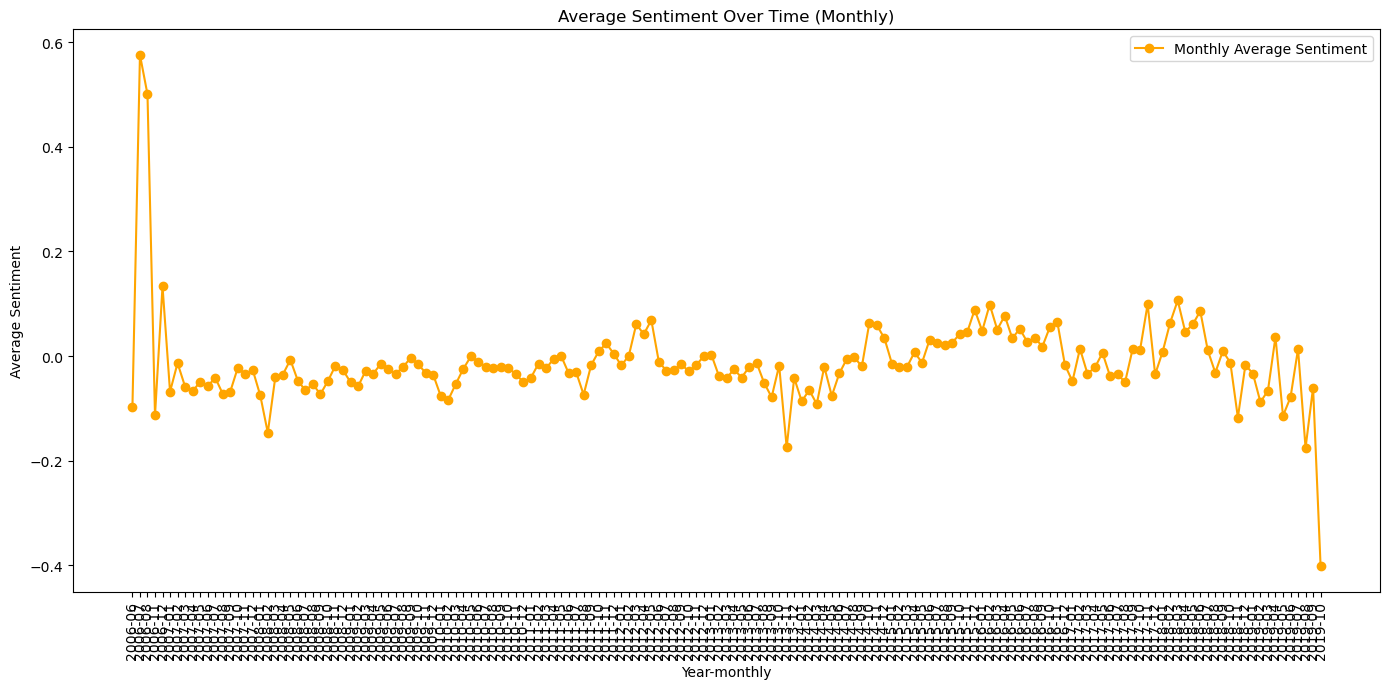

In [70]:
Twitter['created_at'] = pd.to_datetime(Twitter['created_at'])
Twitter['year'] = Twitter['created_at'].dt.to_period('Y')
Twitter['year_month'] = Twitter['created_at'].dt.to_period('M')

# Group by year and month, and calculate average sentiment
sentiment_trend_Y = Twitter.groupby('year')['sentiment'].mean().reset_index()
sentiment_trend_M = Twitter.groupby('year_month')['sentiment'].mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(sentiment_trend_Y['year'].astype(str), sentiment_trend_Y['sentiment'], marker='o', label='Yearly Average Sentiment')
plt.title('Average Sentiment Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Plot for monthly trend
plt.figure(figsize=(14, 7))
plt.plot(sentiment_trend_M['year_month'].astype(str), sentiment_trend_M['sentiment'], marker='o', label='Monthly Average Sentiment', color='orange')
plt.title('Average Sentiment Over Time (Monthly)')
plt.xlabel('Year-monthly')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


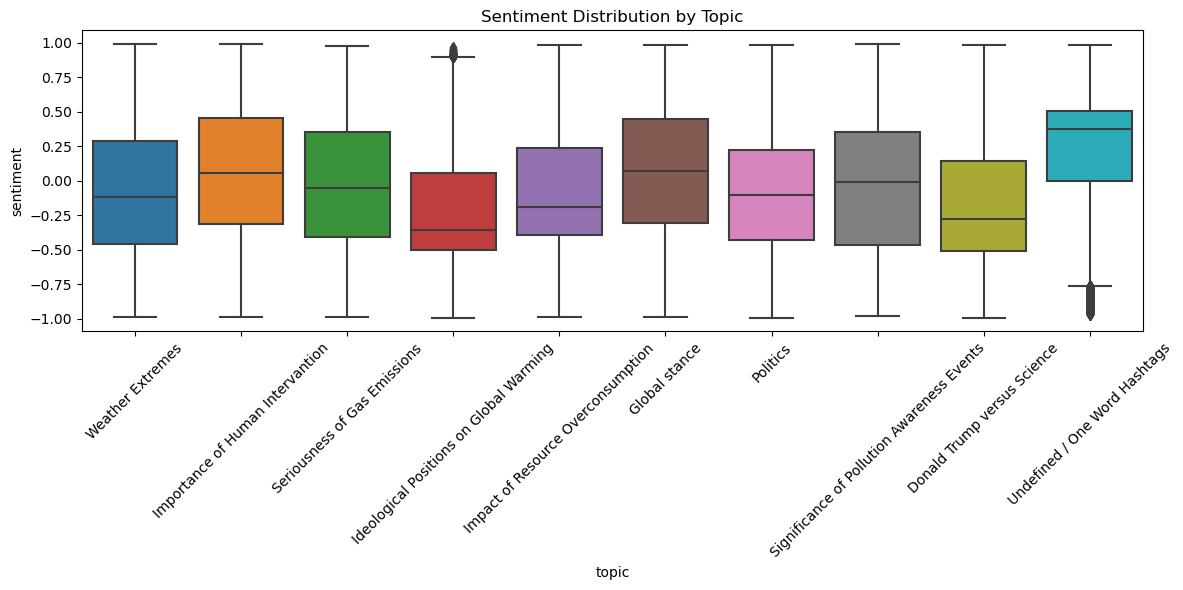

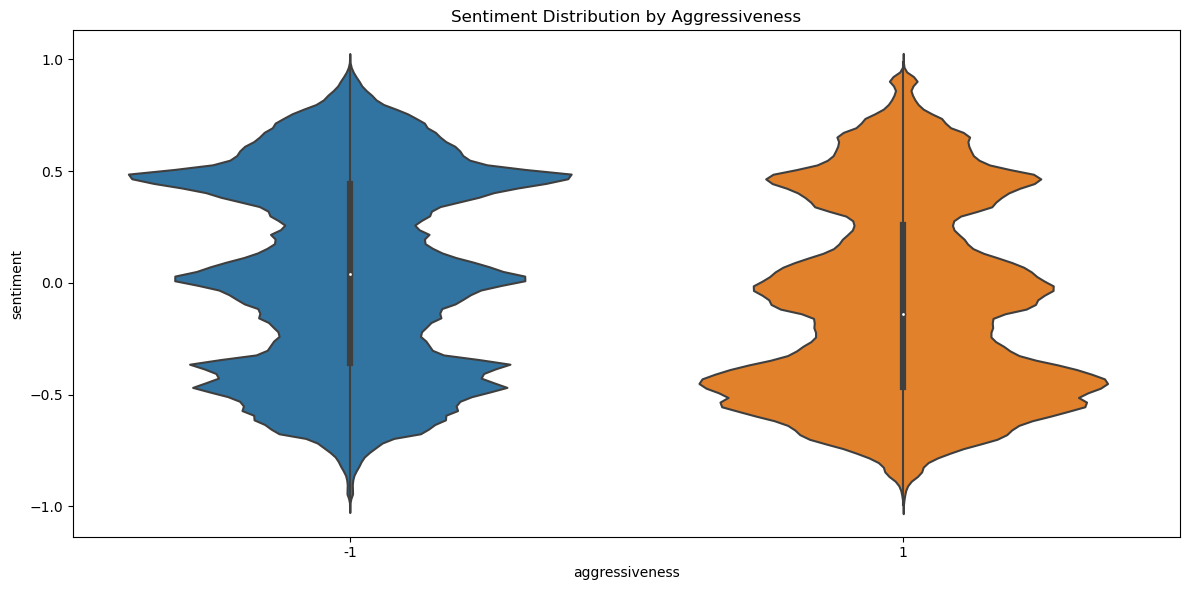

In [202]:
# Sentiment distribution by topic
plt.figure(figsize=(12, 6))
sns.boxplot(x='topic', y='sentiment', data=Twitter)
plt.title('Sentiment Distribution by Topic')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Aggressiveness vs Sentiment
plt.figure(figsize=(12, 6))
sns.violinplot(x='aggressiveness', y='sentiment', data=Twitter)
plt.title('Sentiment Distribution by Aggressiveness')

plt.tight_layout()
plt.show()

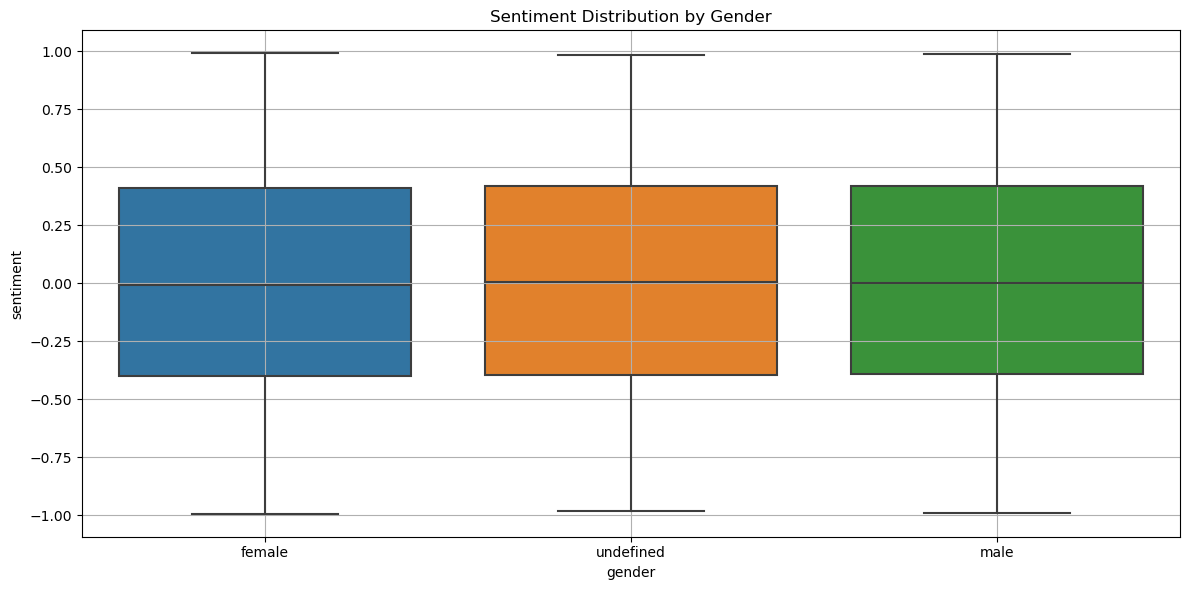

In [72]:
# Sentiment distribution by gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='sentiment', data=Twitter)
plt.title('Sentiment Distribution by Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

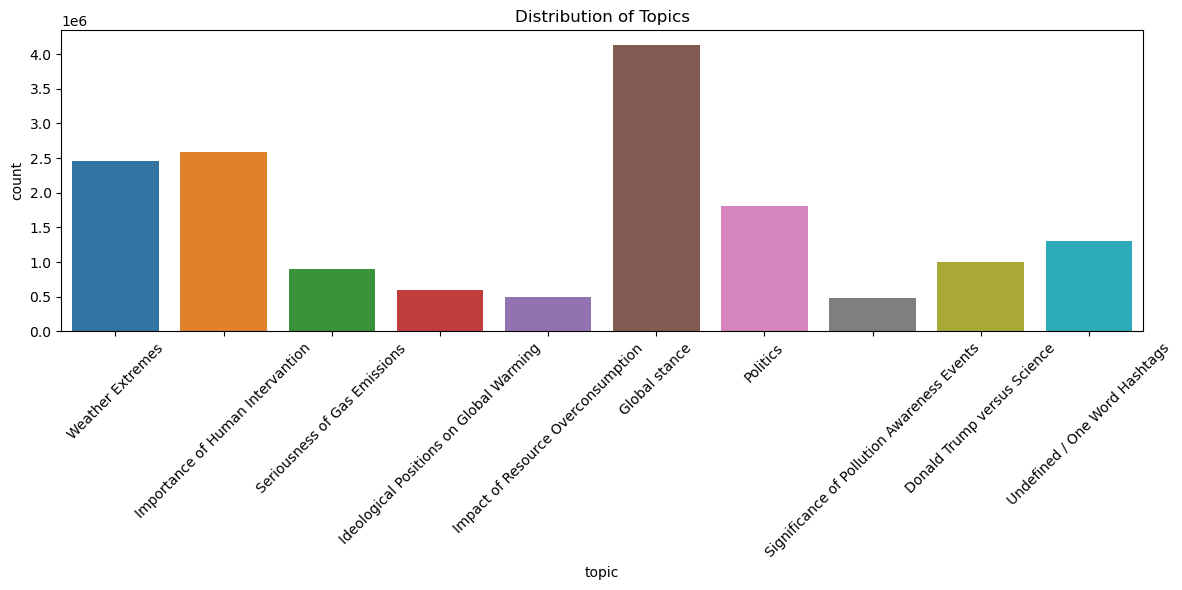

In [73]:
# Topic distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='topic', data=Twitter)
plt.title('Distribution of Topics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [183]:
Twitter['aggressiveness'].unique()

array(['aggressive', 'not aggressive'], dtype=object)

<Axes: >

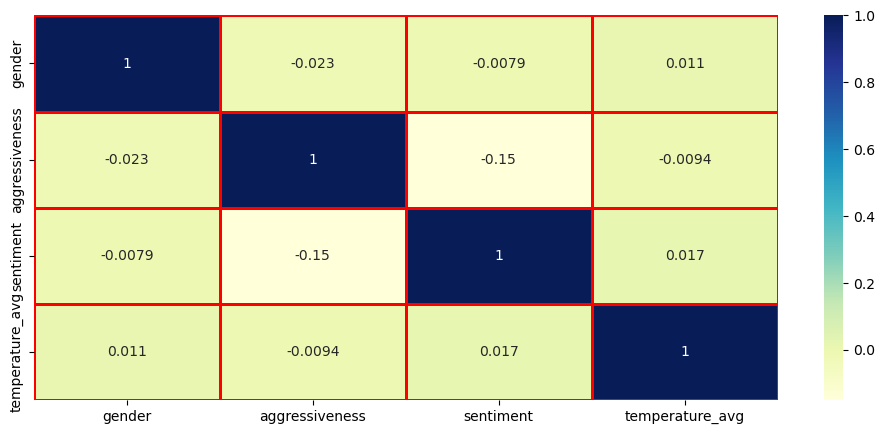

In [189]:
# Correlation matrix
Twitter['gender'] = Twitter['gender'].replace({'female': 1,'undefined': 0, 'male': -1})
Twitter['aggressiveness'] = Twitter['aggressiveness'].replace({'aggressive': 1, 'not aggressive': -1})
X=Twitter[['gender','aggressiveness','sentiment','temperature_avg']]
plt.figure(figsize=(12,5))
sns.heatmap(X.corr(), cmap="YlGnBu",annot=True,linewidths=1,linecolor="red")

In [75]:
# Example: Correlation between 'sentiment' and 'gender'
gender_sentiment_corr = Twitter.groupby('gender')['sentiment'].mean()
print(gender_sentiment_corr)

gender
female      -0.002528
male         0.005002
undefined    0.001492
Name: sentiment, dtype: float64


In [190]:
agg_temp_corr = Twitter.groupby('aggressiveness')['temperature_avg'].mean()
print(agg_temp_corr)

aggressiveness
-1    1.267820
 1    1.189357
Name: temperature_avg, dtype: float64


# Climate Data Modelling


In [76]:
# This is the compiled data for the variables used above
Climate_data=pd.read_excel("Modelling_data.xlsx")
Climate_data.head(3)

Year  Average globe temperature  \
0  01/01/2000                   0.331085   
1  01/02/2000                   0.331085   
2  01/03/2000                   0.331085   

   Air Temperature in presence of Sea Ice  \
0                                   0.338   
1                                   0.598   
2                                   0.568   

   Sea Temperature in presence of Sea Ice  Carbon dioxide emission (Gg)  \
0                                   0.036                        369.45   
1                                   0.036                        369.71   
2                                   0.036                        370.75   

   Antarctic Mass (Gigatonnes)  GMSL (GIA Applied) Variation  Ocean Ph  \
0                          0.0                          12.8  8.087161   
1                          0.0                          15.5  8.087161   
2                          0.0                          19.4  8.087161   

     methane  
0  40.871808  
1  40.866837  
2  40.861865

In [77]:
Climate_data.columns

Index(['Year', 'Average globe temperature',
       'Air Temperature in presence of Sea Ice',
       'Sea Temperature in presence of Sea Ice',
       'Carbon dioxide emission (Gg)', 'Antarctic Mass (Gigatonnes)',
       'GMSL (GIA Applied) Variation', 'Ocean Ph', 'methane'],
      dtype='object')

In [78]:
Climate_data.rename(columns={
    'Average globe temperature': 'Average_globe_temperature',
    'Air Temperature in presence of Sea Ice': 'Air_Temperature_in_presence_of_Sea_Ice',
    'Sea Temperature in presence of Sea Ice': 'Sea_Temperature_in_presence_of_Sea_Ice',
    'Carbon dioxide emission (Gg)': 'Carbon_dioxide_emission_Gg',
    'Antarctic Mass (Gigatonnes)': 'Antarctic_Mass_Gigatonnes',
    'GMSL (GIA Applied) Variation': 'Sea_Level_increase_mm',
    'Ocean Ph': 'Ph_of_Oceans',
    'methane': 'Methane_emission_in_co2_equivalent_Gg'
}, inplace=True)

In [79]:
Climate_data.columns

Index(['Year', 'Average_globe_temperature',
       'Air_Temperature_in_presence_of_Sea_Ice',
       'Sea_Temperature_in_presence_of_Sea_Ice', 'Carbon_dioxide_emission_Gg',
       'Antarctic_Mass_Gigatonnes', 'Sea_Level_increase_mm', 'Ph_of_Oceans',
       'Methane_emission_in_co2_equivalent_Gg'],
      dtype='object')

In [80]:
Climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    296 non-null    object 
 1   Average_globe_temperature               296 non-null    float64
 2   Air_Temperature_in_presence_of_Sea_Ice  296 non-null    float64
 3   Sea_Temperature_in_presence_of_Sea_Ice  296 non-null    float64
 4   Carbon_dioxide_emission_Gg              296 non-null    float64
 5   Antarctic_Mass_Gigatonnes               296 non-null    float64
 6   Sea_Level_increase_mm                   296 non-null    float64
 7   Ph_of_Oceans                            296 non-null    float64
 8   Methane_emission_in_co2_equivalent_Gg   296 non-null    float64
dtypes: float64(8), object(1)
memory usage: 20.9+ KB


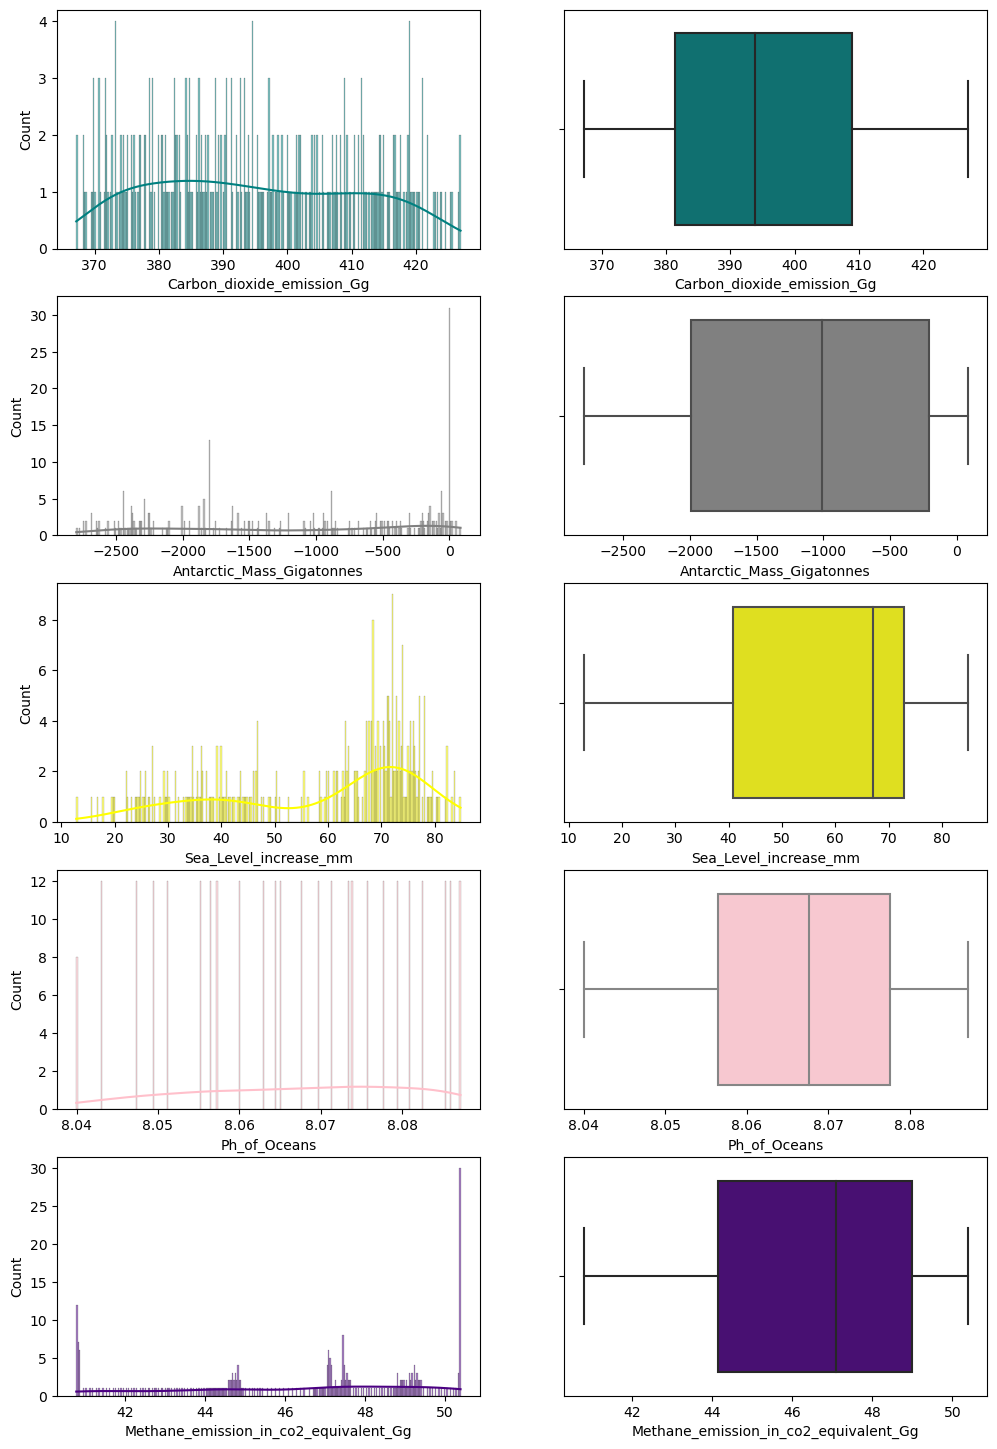

In [194]:
# Check for outliers
fig, axes = plt.subplots(5,2,figsize=(12,18))
sns.histplot(data=Climate_data,x="Carbon_dioxide_emission_Gg",bins=296,kde=True,color="teal",ax=axes[0,0])
sns.boxplot(data=Climate_data,x="Carbon_dioxide_emission_Gg",color="teal",ax=axes[0,1])
sns.histplot(data=Climate_data,x="Antarctic_Mass_Gigatonnes",bins=296,kde=True,color="gray",ax=axes[1,0])
sns.boxplot(data=Climate_data,x="Antarctic_Mass_Gigatonnes",color="gray",ax=axes[1,1])
sns.histplot(data=Climate_data,x="Sea_Level_increase_mm",bins=296,kde=True,color="yellow",ax=axes[2,0])
sns.boxplot(data=Climate_data,x="Sea_Level_increase_mm",color="yellow",ax=axes[2,1])
sns.histplot(data=Climate_data,x="Ph_of_Oceans",bins=296,kde=True,color="pink",ax=axes[3,0])
sns.boxplot(data=Climate_data,x="Ph_of_Oceans",color="pink",ax=axes[3,1])
sns.histplot(data=Climate_data,x="Methane_emission_in_co2_equivalent_Gg",bins=296,kde=True,color="indigo",ax=axes[4,0])
sns.boxplot(data=Climate_data,x="Methane_emission_in_co2_equivalent_Gg",color="indigo",ax=axes[4,1])
plt.show()

# Random Forest


In [82]:
X=Climate_data.drop(["Year","Average_globe_temperature"],axis=1)
y=Climate_data["Average_globe_temperature"]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=0)

In [83]:
X.columns


Index(['Air_Temperature_in_presence_of_Sea_Ice',
       'Sea_Temperature_in_presence_of_Sea_Ice', 'Carbon_dioxide_emission_Gg',
       'Antarctic_Mass_Gigatonnes', 'Sea_Level_increase_mm', 'Ph_of_Oceans',
       'Methane_emission_in_co2_equivalent_Gg'],
      dtype='object')

>Random forest regressor is not affected y multicollinearity, so modelling directly

In [84]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(x_train, y_train)
y_train_pred = rf_regressor.predict(x_train)
y_test_pred = rf_regressor.predict(x_test)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Mean Squared Error:", train_mse)
print("Training R-squared:", train_r2)
print("Testing Mean Squared Error:", test_mse)
print("Testing R-squared:", test_r2)

Training Mean Squared Error: 0.00011576404526769248
Training R-squared: 0.9980716941421961
Testing Mean Squared Error: 0.00032593081233589375
Testing R-squared: 0.9950196256271897


In [85]:
importances = rf_regressor.feature_importances_
feature_names = x_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                                  Feature  Importance
5                            Ph_of_Oceans    0.740998
6   Methane_emission_in_co2_equivalent_Gg    0.216769
3               Antarctic_Mass_Gigatonnes    0.022371
4                   Sea_Level_increase_mm    0.010838
0  Air_Temperature_in_presence_of_Sea_Ice    0.005860
2              Carbon_dioxide_emission_Gg    0.002400
1  Sea_Temperature_in_presence_of_Sea_Ice    0.000764


In [86]:
import pandas as pd

def get_user_input_and_predict(rf_regressor):
    # Get input values from user
    Air_Temperature_in_presence_of_Sea_Ice = float(input("Enter the Air Temperature in presence of Sea Ice in Celsius: "))
    Sea_Temperature_in_presence_of_Sea_Ice = float(input("Enter the value of Sea Temperature in presence of Sea Ice in Celsius: ")) 
    Carbon_dioxide_emission_Gg = float(input("Enter the value of Carbon dioxide emission in Gigagrams: "))
    Antarctic_Mass_Gigatonnes = float(input("Enter the measured value of Antarctic Mass (Gigatonnes) for the year 2000: ")) 
    Sea_Level_increase_mm = float(input("Enter the measured value of Sea Level increase (mm): ")) 
    Ph_of_Oceans = float(input("Enter the pH of Oceans: "))  
    Methane_emission_in_co2_equivalent_Gg = float(input("Enter the value of methane emission in CO2 equivalent in Gigagrams: "))
    
    # Create a DataFrame with the input data
    input_data = {
        'Air_Temperature_in_presence_of_Sea_Ice': [Air_Temperature_in_presence_of_Sea_Ice],
        'Sea_Temperature_in_presence_of_Sea_Ice': [Sea_Temperature_in_presence_of_Sea_Ice],
        'Carbon_dioxide_emission_Gg': [Carbon_dioxide_emission_Gg],
        'Antarctic_Mass_Gigatonnes': [Antarctic_Mass_Gigatonnes],
        'Sea_Level_increase_mm': [Sea_Level_increase_mm],
        'Ph_of_Oceans': [Ph_of_Oceans],
        'Methane_emission_in_co2_equivalent_Gg': [Methane_emission_in_co2_equivalent_Gg]   
    }
    
    input_df = pd.DataFrame(input_data)
    
    # Predict temperature using the trained model
    predicted_temp = rf_regressor.predict(input_df)
    print(f"Predicted Global Temperature: {predicted_temp[0]} °C")

# Example usage
# Make sure to have your trained rf_regressor model ready
get_user_input_and_predict(rf_regressor)



Enter the Air Temperature in presence of Sea Ice in Celsius: 5
Enter the value of Sea Temperature in presence of Sea Ice in Celsius: 5
Enter the value of Carbon dioxide emission in Gigagrams: 5
Enter the measured value of Antarctic Mass (Gigatonnes) for the year 2000: 5
Enter the measured value of Sea Level increase (mm): 5
Enter the pH of Oceans: 5
Enter the value of methane emission in CO2 equivalent in Gigagrams: 5
Predicted Global Temperature: 1.2199003898999998 °C


# Multiple Linear Regression Modelling

<Axes: >

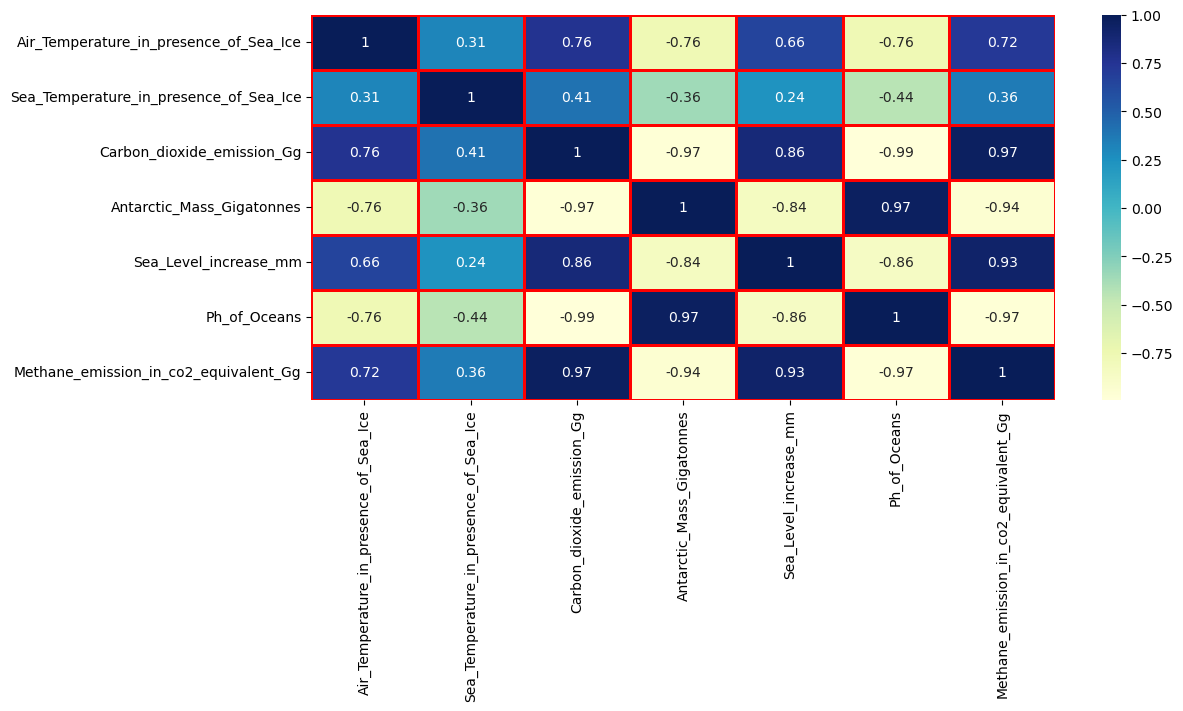

In [87]:
# Checking for multicollinearity
plt.figure(figsize=(12,5))
sns.heatmap(X.corr(), cmap="YlGnBu",annot=True,linewidths=1,linecolor="red")

In [88]:
#lets check for variance of each variables, 
variance = X.var()
print(variance)

Air_Temperature_in_presence_of_Sea_Ice         0.042984
Sea_Temperature_in_presence_of_Sea_Ice         0.000083
Carbon_dioxide_emission_Gg                   264.770376
Antarctic_Mass_Gigatonnes                 862874.246079
Sea_Level_increase_mm                        346.430553
Ph_of_Oceans                                   0.000179
Methane_emission_in_co2_equivalent_Gg          9.250197
dtype: float64


In [89]:
# Variables have quite different variance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
# Convert back to DataFrame for easy handling
scaled_X = pd.DataFrame(scaled_features, columns=X.columns)

In [90]:
# Variance inflation factor to check dependent variables
vif_data = pd.DataFrame()
vif_data["Feature"] = scaled_X.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_X.values, i) for i in range(scaled_X.shape[1])]

print(vif_data)

                                  Feature        VIF
0  Air_Temperature_in_presence_of_Sea_Ice   2.518398
1  Sea_Temperature_in_presence_of_Sea_Ice   1.592176
2              Carbon_dioxide_emission_Gg  70.804807
3               Antarctic_Mass_Gigatonnes  18.835944
4                   Sea_Level_increase_mm   9.242004
5                            Ph_of_Oceans  96.482794
6   Methane_emission_in_co2_equivalent_Gg  42.555732


In [91]:
X_new=scaled_X.drop(['Ph_of_Oceans'],axis=1)
Int=X_new.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X_new.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X_new.shape[1])]
VIF

feature       VIF
0  Air_Temperature_in_presence_of_Sea_Ice  1.378424
1  Sea_Temperature_in_presence_of_Sea_Ice  1.211684
2              Carbon_dioxide_emission_Gg  6.571057
3               Antarctic_Mass_Gigatonnes  4.537177
4                   Sea_Level_increase_mm  1.668379
5   Methane_emission_in_co2_equivalent_Gg  4.884031

In [92]:
y=Climate_data["Average_globe_temperature"]
x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size=0.15, random_state=0)

In [93]:
# Training model
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
lr
print(lr.summary())

                                OLS Regression Results                               
Dep. Variable:     Average_globe_temperature   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.819
Method:                        Least Squares   F-statistic:                     189.7
Date:                       Thu, 19 Sep 2024   Prob (F-statistic):           6.54e-89
Time:                               16:04:43   Log-Likelihood:                 214.54
No. Observations:                        251   AIC:                            -415.1
Df Residuals:                            244   BIC:                            -390.4
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [94]:
y_train_pred = lr.predict(x_train_sm)
residuals = y_train - y_train_pred
x_test_sm = sm.add_constant(x_test)  # Add constant to the test features
y_test_pred = lr.predict(x_test_sm)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)  # Root Mean Squared Error
r2_train = r2_score(y_train, y_train_pred)
print("Training Data Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"R-squared: {r2_train}")

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)  # Root Mean Squared Error
r2_test = r2_score(y_test, y_test_pred)
print("\nTesting Data Metrics:")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"R-squared: {r2_test}")

Training Data Metrics:
Mean Absolute Error (MAE): 0.07851244627248083
Mean Squared Error (MSE): 0.010595562349498237
Root Mean Squared Error (RMSE): 0.10293474801784981
R-squared: 0.8235075070327866

Testing Data Metrics:
Mean Absolute Error (MAE): 0.07620978250313432
Mean Squared Error (MSE): 0.009342157612943412
Root Mean Squared Error (RMSE): 0.09665483750409708
R-squared: 0.8572474874995597


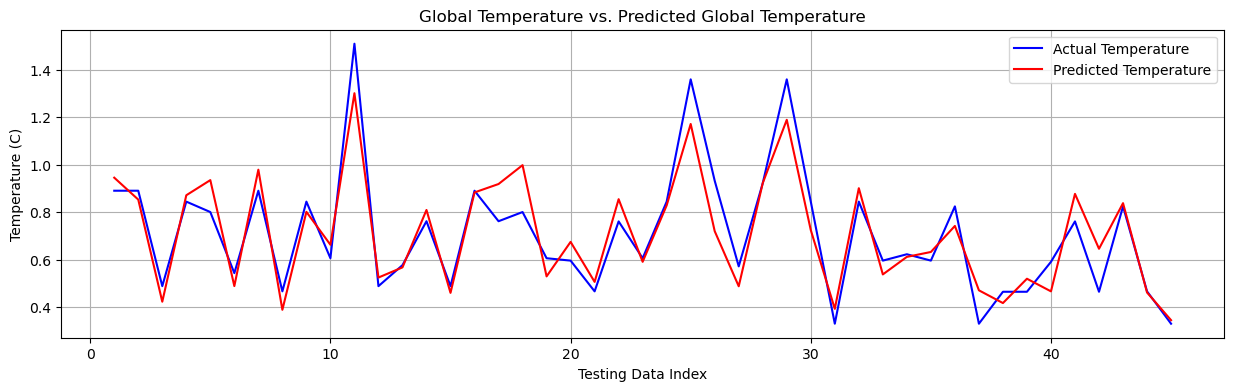

In [95]:
x_test_sm = sm.add_constant(x_test)
# Make predictions using the model
Temperature_Predicted = lr.predict(x_test_sm)
# Define the x values for plotting (assuming x_test has the same length as y_test and Temperature_Predicted)
x = np.arange(1, len(y_test) + 1)
# Prepare the data for plotting
y1 = y_test.values  # Ensure y_test is a numpy array or pandas Series
y2 = Temperature_Predicted
# Plotting
plt.figure(figsize=(15, 4))
plt.title("Global Temperature vs. Predicted Global Temperature")
plt.xlabel("Testing Data Index")
plt.ylabel("Temperature (C)")
plt.plot(x, y1, color="blue", label="Actual Temperature")
plt.plot(x, y2, color="red", label="Predicted Temperature")
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [96]:
import pandas as pd

def get_user_input_and_predict(lr):
    # Get input values from user
    const = 1
    Air_Temperature_in_presence_of_Sea_Ice = float(input("Enter the Air Temperature in presence of Sea Ice in Celsius: "))
    Sea_Temperature_in_presence_of_Sea_Ice = float(input("Enter the value of Sea Temperature in presence of Sea Ice in Celsius: ")) 
    Carbon_dioxide_emission_Gg = float(input("Enter the value of Carbon dioxide emission in Gigagrams: "))
    Antarctic_Mass_Gigatonnes = float(input("Enter the measured value of Antarctic Mass (Gigatonnes) for the year 2000: ")) 
    Sea_Level_increase_mm = float(input("Enter the measured value of Sea Level increase (mm): ")) 
    Methane_emission_in_co2_equivalent_Gg = float(input("Enter the value of methane emission in CO2 equivalent in Gigagrams: "))
    
    # Create a DataFrame with the input data
    input_data = {
        'cons': [1],
        'Air_Temperature_in_presence_of_Sea_Ice': [Air_Temperature_in_presence_of_Sea_Ice],
        'Sea_Temperature_in_presence_of_Sea_Ice': [Sea_Temperature_in_presence_of_Sea_Ice],
        'Carbon_dioxide_emission_Gg': [Carbon_dioxide_emission_Gg],
        'Antarctic_Mass_Gigatonnes': [Antarctic_Mass_Gigatonnes],
        'Sea_Level_increase_mm': [Sea_Level_increase_mm],
        'Methane_emission_in_co2_equivalent_Gg': [Methane_emission_in_co2_equivalent_Gg]   
    }
    
    input_df = pd.DataFrame(input_data)
    
    # Predict temperature using the trained model
    predicted_temp = lr.predict(input_df)
    print(f"Predicted Global Temperature: {predicted_temp[0]} °C")

# Example usage
# Make sure to have your trained rf_regressor model ready
get_user_input_and_predict(lr)



Enter the Air Temperature in presence of Sea Ice in Celsius: 5
Enter the value of Sea Temperature in presence of Sea Ice in Celsius: 5
Enter the value of Carbon dioxide emission in Gigagrams: 5
Enter the measured value of Antarctic Mass (Gigatonnes) for the year 2000: 5
Enter the measured value of Sea Level increase (mm): 5
Enter the value of methane emission in CO2 equivalent in Gigagrams: 5
Predicted Global Temperature: 2.727261925056867 °C


>Checking assumptions of MLR

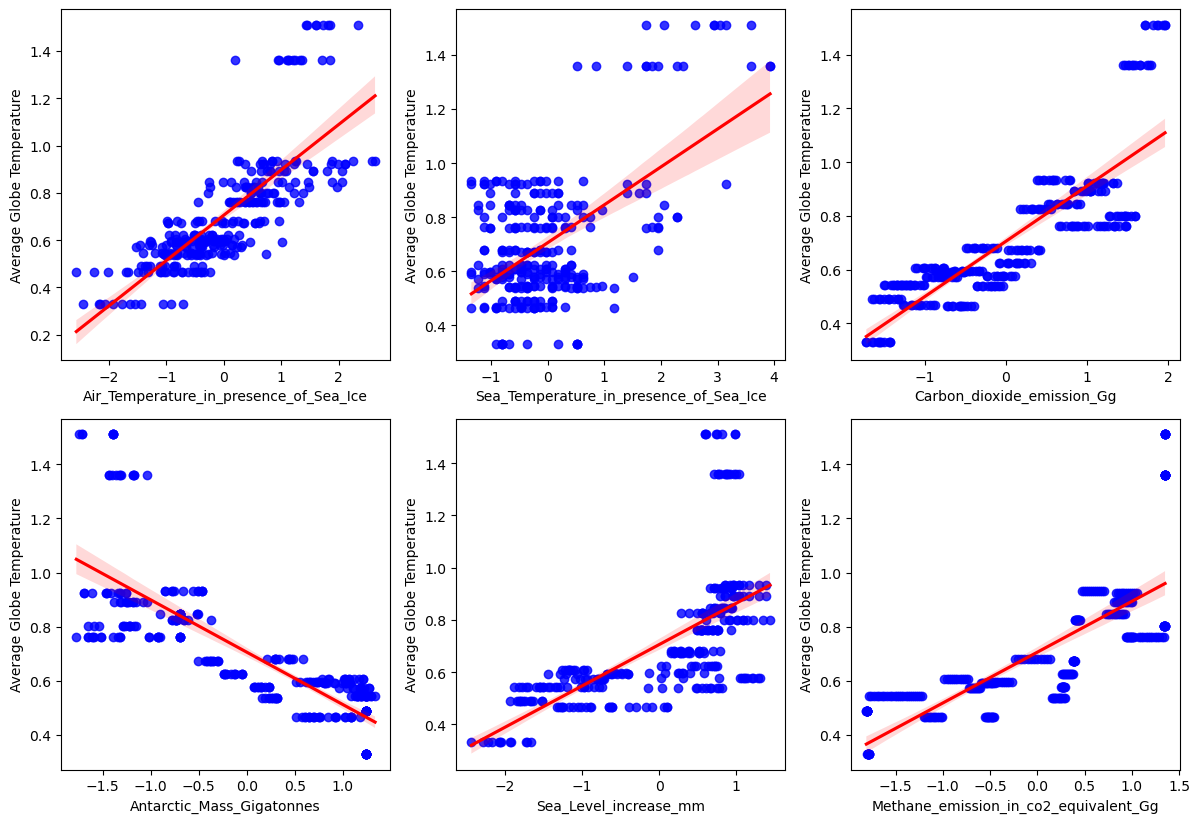

In [197]:
plt.figure(figsize=(12, 12))

variables = [
    'Air_Temperature_in_presence_of_Sea_Ice',
    'Sea_Temperature_in_presence_of_Sea_Ice',
    'Carbon_dioxide_emission_Gg',
    'Antarctic_Mass_Gigatonnes',
    'Sea_Level_increase_mm',
    'Methane_emission_in_co2_equivalent_Gg'
]

for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=X_new[var], y=Climate_data['Average_globe_temperature'], 
                scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

    plt.xlabel(var)
    plt.ylabel('Average Globe Temperature')

plt.tight_layout()
plt.show()



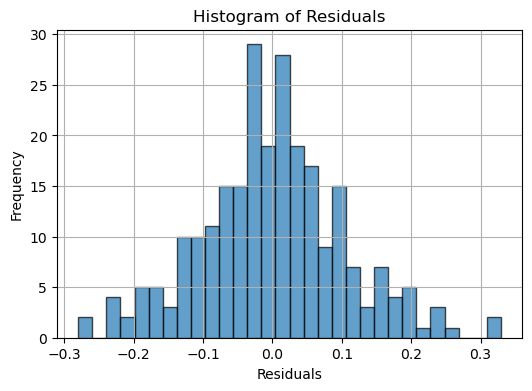

In [198]:
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import scipy.stats as stats


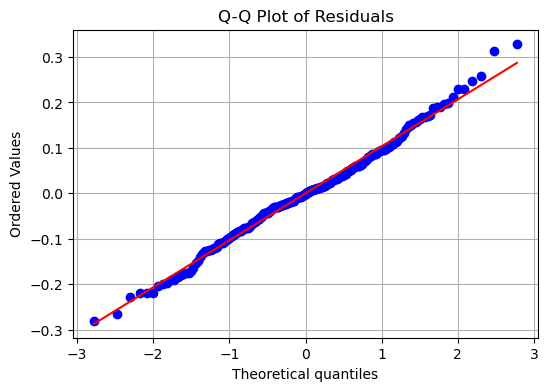

Shapiro-Wilk Test Statistic: 0.9922977685928345, p-value: 0.2159295529127121
Residuals appear to follow a normal distribution (fail to reject H0).


In [199]:
plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

if p_value > 0.05:
    print("Residuals appear to follow a normal distribution (fail to reject H0).")
else:
    print("Residuals do not follow a normal distribution (reject H0).")


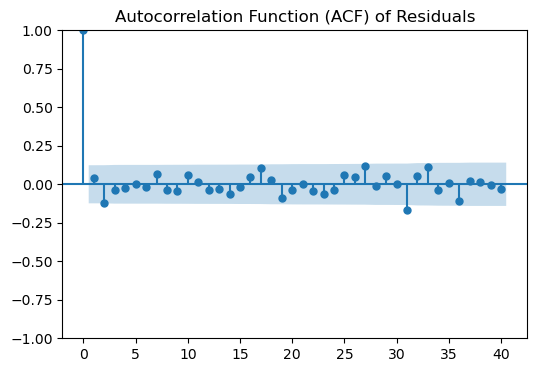

Durbin-Watson Statistic: 1.9180719942256892
     lb_stat  lb_pvalue
10  7.543494   0.673331


In [99]:
# ACF Plot
plt.figure(figsize=(6,4))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

# Durbin-Watson Test
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw_stat}')

# Ljung-Box Test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)


>>The Durbin-Watson statistic you provided is approximately 1.92, A value close to 2 suggests that there is no autocorrelation in the residuals.                                                                                                               
The Ljung-Box test Since p-value is 0.673, it implies that there is no significant evidence of autocorrelation in the residuals

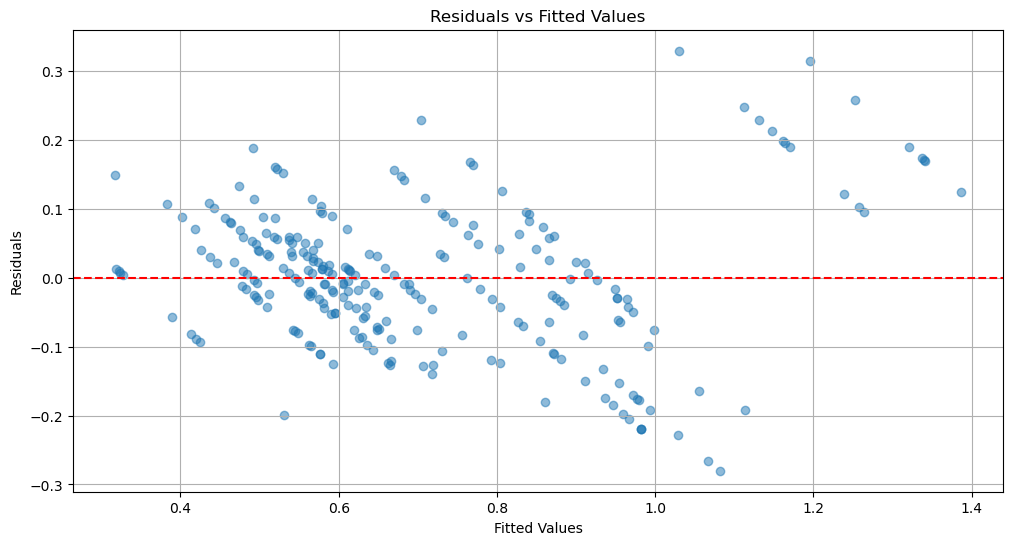

In [100]:
# Plot residuals vs fitted values
plt.figure(figsize=(12, 6))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [101]:
# Perform Goldfeld-Quandt test
gq_test_results = het_goldfeldquandt(residuals, x_train)
print(f'Goldfeld-Quandt test statistic: {gq_test_results[0]}')
print(f'Goldfeld-Quandt p-value: {gq_test_results[1]}')

Goldfeld-Quandt test statistic: 0.8897895693986138
Goldfeld-Quandt p-value: 0.7377474327231455


>>Since the test statistic is close to 1 and the p-value is high, this indicates that the residuals of your regression model exhibit constant variance (homoscedasticity).

# LSTM (Long Short-Term Memory) Modelling

In [156]:
Climate_data.columns

Index(['Year', 'Average_globe_temperature',
       'Air_Temperature_in_presence_of_Sea_Ice',
       'Sea_Temperature_in_presence_of_Sea_Ice', 'Carbon_dioxide_emission_Gg',
       'Antarctic_Mass_Gigatonnes', 'Sea_Level_increase_mm', 'Ph_of_Oceans',
       'Methane_emission_in_co2_equivalent_Gg'],
      dtype='object')

In [159]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

features = ['Average_globe_temperature', 
            'Air_Temperature_in_presence_of_Sea_Ice', 
            'Sea_Temperature_in_presence_of_Sea_Ice', 
            'Carbon_dioxide_emission_Gg', 
            'Antarctic_Mass_Gigatonnes', 
            'Sea_Level_increase_mm', 
            'Ph_of_Oceans', 
            'Methane_emission_in_co2_equivalent_Gg']

# Converting to numpy array and scale
data = Climate_data[features].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])  # Use all features
        Y.append(data[i + time_step, :])      # Predict the next step for all features
    return np.array(X), np.array(Y)

time_step = 10  # Choose your time step
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], len(features))


In [160]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], len(features))))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(len(features)))  # Output layer for all features

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=200, batch_size=32, verbose=1)

# 1. Predict past values (for training data)
predictions = model.predict(X)



Epoch 1/200


D:\New folder (2)\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2334
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0670
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0373
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0292
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0257
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0223
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0216
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0213
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0208
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0196
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0203
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0179
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0158
Epoch 16/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s

In [161]:
# 2. Forecast future values
future_steps = 20  # Number of future time steps to forecast
last_sequence = scaled_data[-time_step:].reshape(1, time_step, len(features))  # Get last time_step data
forecasted_values = []
uncertainties = []

for _ in range(future_steps):
    predicted_value = model.predict(last_sequence)
    
    # Store the predicted value
    forecasted_values.append(predicted_value[0])
    
    # Calculate the uncertainty (standard deviation)
    std_dev = np.std(predicted_value)
    uncertainties.append(std_dev)
    
    # Update last_sequence by appending the predicted value and removing the first value
    last_sequence = np.append(last_sequence[:, 1:, :], predicted_value.reshape(1, 1, len(features)), axis=1)

# Convert predictions and forecasted values back to original scale
predictions = scaler.inverse_transform(predictions)
forecasted_values = scaler.inverse_transform(np.array(forecasted_values))
uncertainties = np.array(uncertainties).reshape(-1, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [170]:
# Function to calculate accuracy metrics for each variable
def evaluate_model(predictions, actual_values, feature_names):
    for i, feature in enumerate(feature_names):
        # Extract predicted and actual values for the feature
        predicted = predictions[:, i]
        actual = actual_values[:, i]

        # Calculate metrics
        mse = mean_squared_error(actual, predicted)
        mae = mean_absolute_error(actual, predicted)
        r2 = r2_score(actual, predicted)
        
        print(f"Accuracy Metrics for {feature}:")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"R-squared (R²): {r2:.4f}")
        print("-" * 40)

# Calculate accuracy of the model on the predicted past values
evaluate_model(predictions, data[time_step:], features)

Accuracy Metrics for Average_globe_temperature:
Mean Squared Error (MSE): 0.0031
Mean Absolute Error (MAE): 0.0377
R-squared (R²): 0.9472
----------------------------------------
Accuracy Metrics for Air_Temperature_in_presence_of_Sea_Ice:
Mean Squared Error (MSE): 0.0111
Mean Absolute Error (MAE): 0.0824
R-squared (R²): 0.7224
----------------------------------------
Accuracy Metrics for Sea_Temperature_in_presence_of_Sea_Ice:
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0046
R-squared (R²): 0.5781
----------------------------------------
Accuracy Metrics for Carbon_dioxide_emission_Gg:
Mean Squared Error (MSE): 4.9837
Mean Absolute Error (MAE): 1.8751
R-squared (R²): 0.9801
----------------------------------------
Accuracy Metrics for Antarctic_Mass_Gigatonnes:
Mean Squared Error (MSE): 15073.4391
Mean Absolute Error (MAE): 96.3143
R-squared (R²): 0.9821
----------------------------------------
Accuracy Metrics for Sea_Level_increase_mm:
Mean Squared Error (MSE): 22.

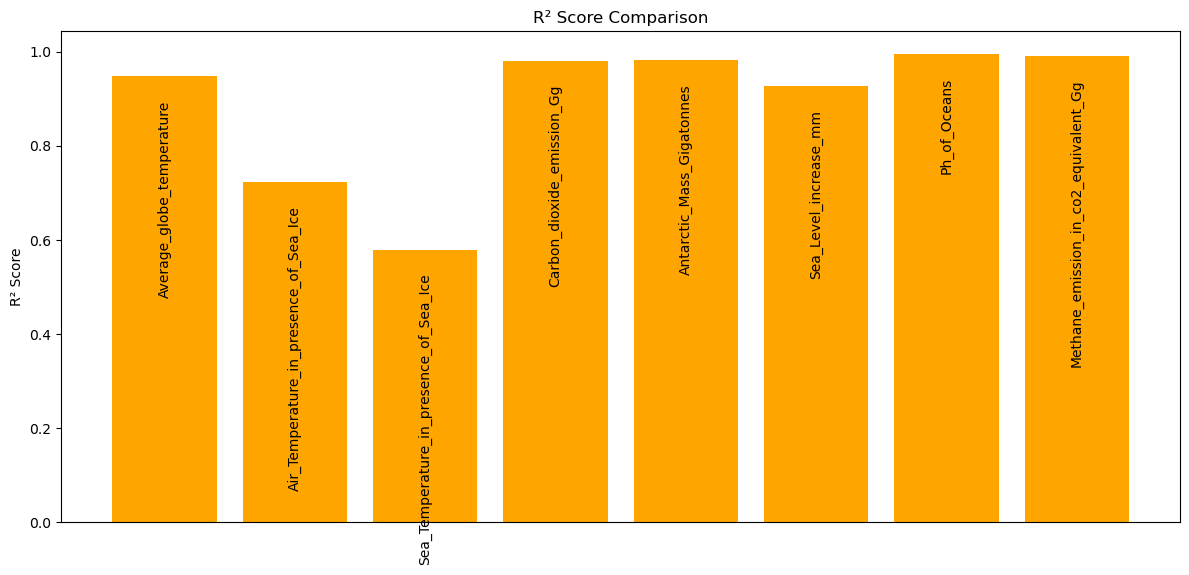

In [200]:
Variables = ['Average_globe_temperature','Air_Temperature_in_presence_of_Sea_Ice', 'Sea_Temperature_in_presence_of_Sea_Ice', 
            'Carbon_dioxide_emission_Gg', 'Antarctic_Mass_Gigatonnes', 'Sea_Level_increase_mm', 'Ph_of_Oceans', 
            'Methane_emission_in_co2_equivalent_Gg']  
r2_scores = [0.9472,0.7224,0.5781,0.9801,0.9821,0.9268,0.9942,0.9910]   

plt.figure(figsize=(12, 6))
bars = plt.bar(Variables, r2_scores, color='orange')

for bar, variable in zip(bars, Variables):
    yval = bar.get_height()  # Get the height of each bar
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, variable, ha='center', va='top', rotation=90, fontsize=10)

plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.xticks([])
plt.tight_layout()
plt.show()



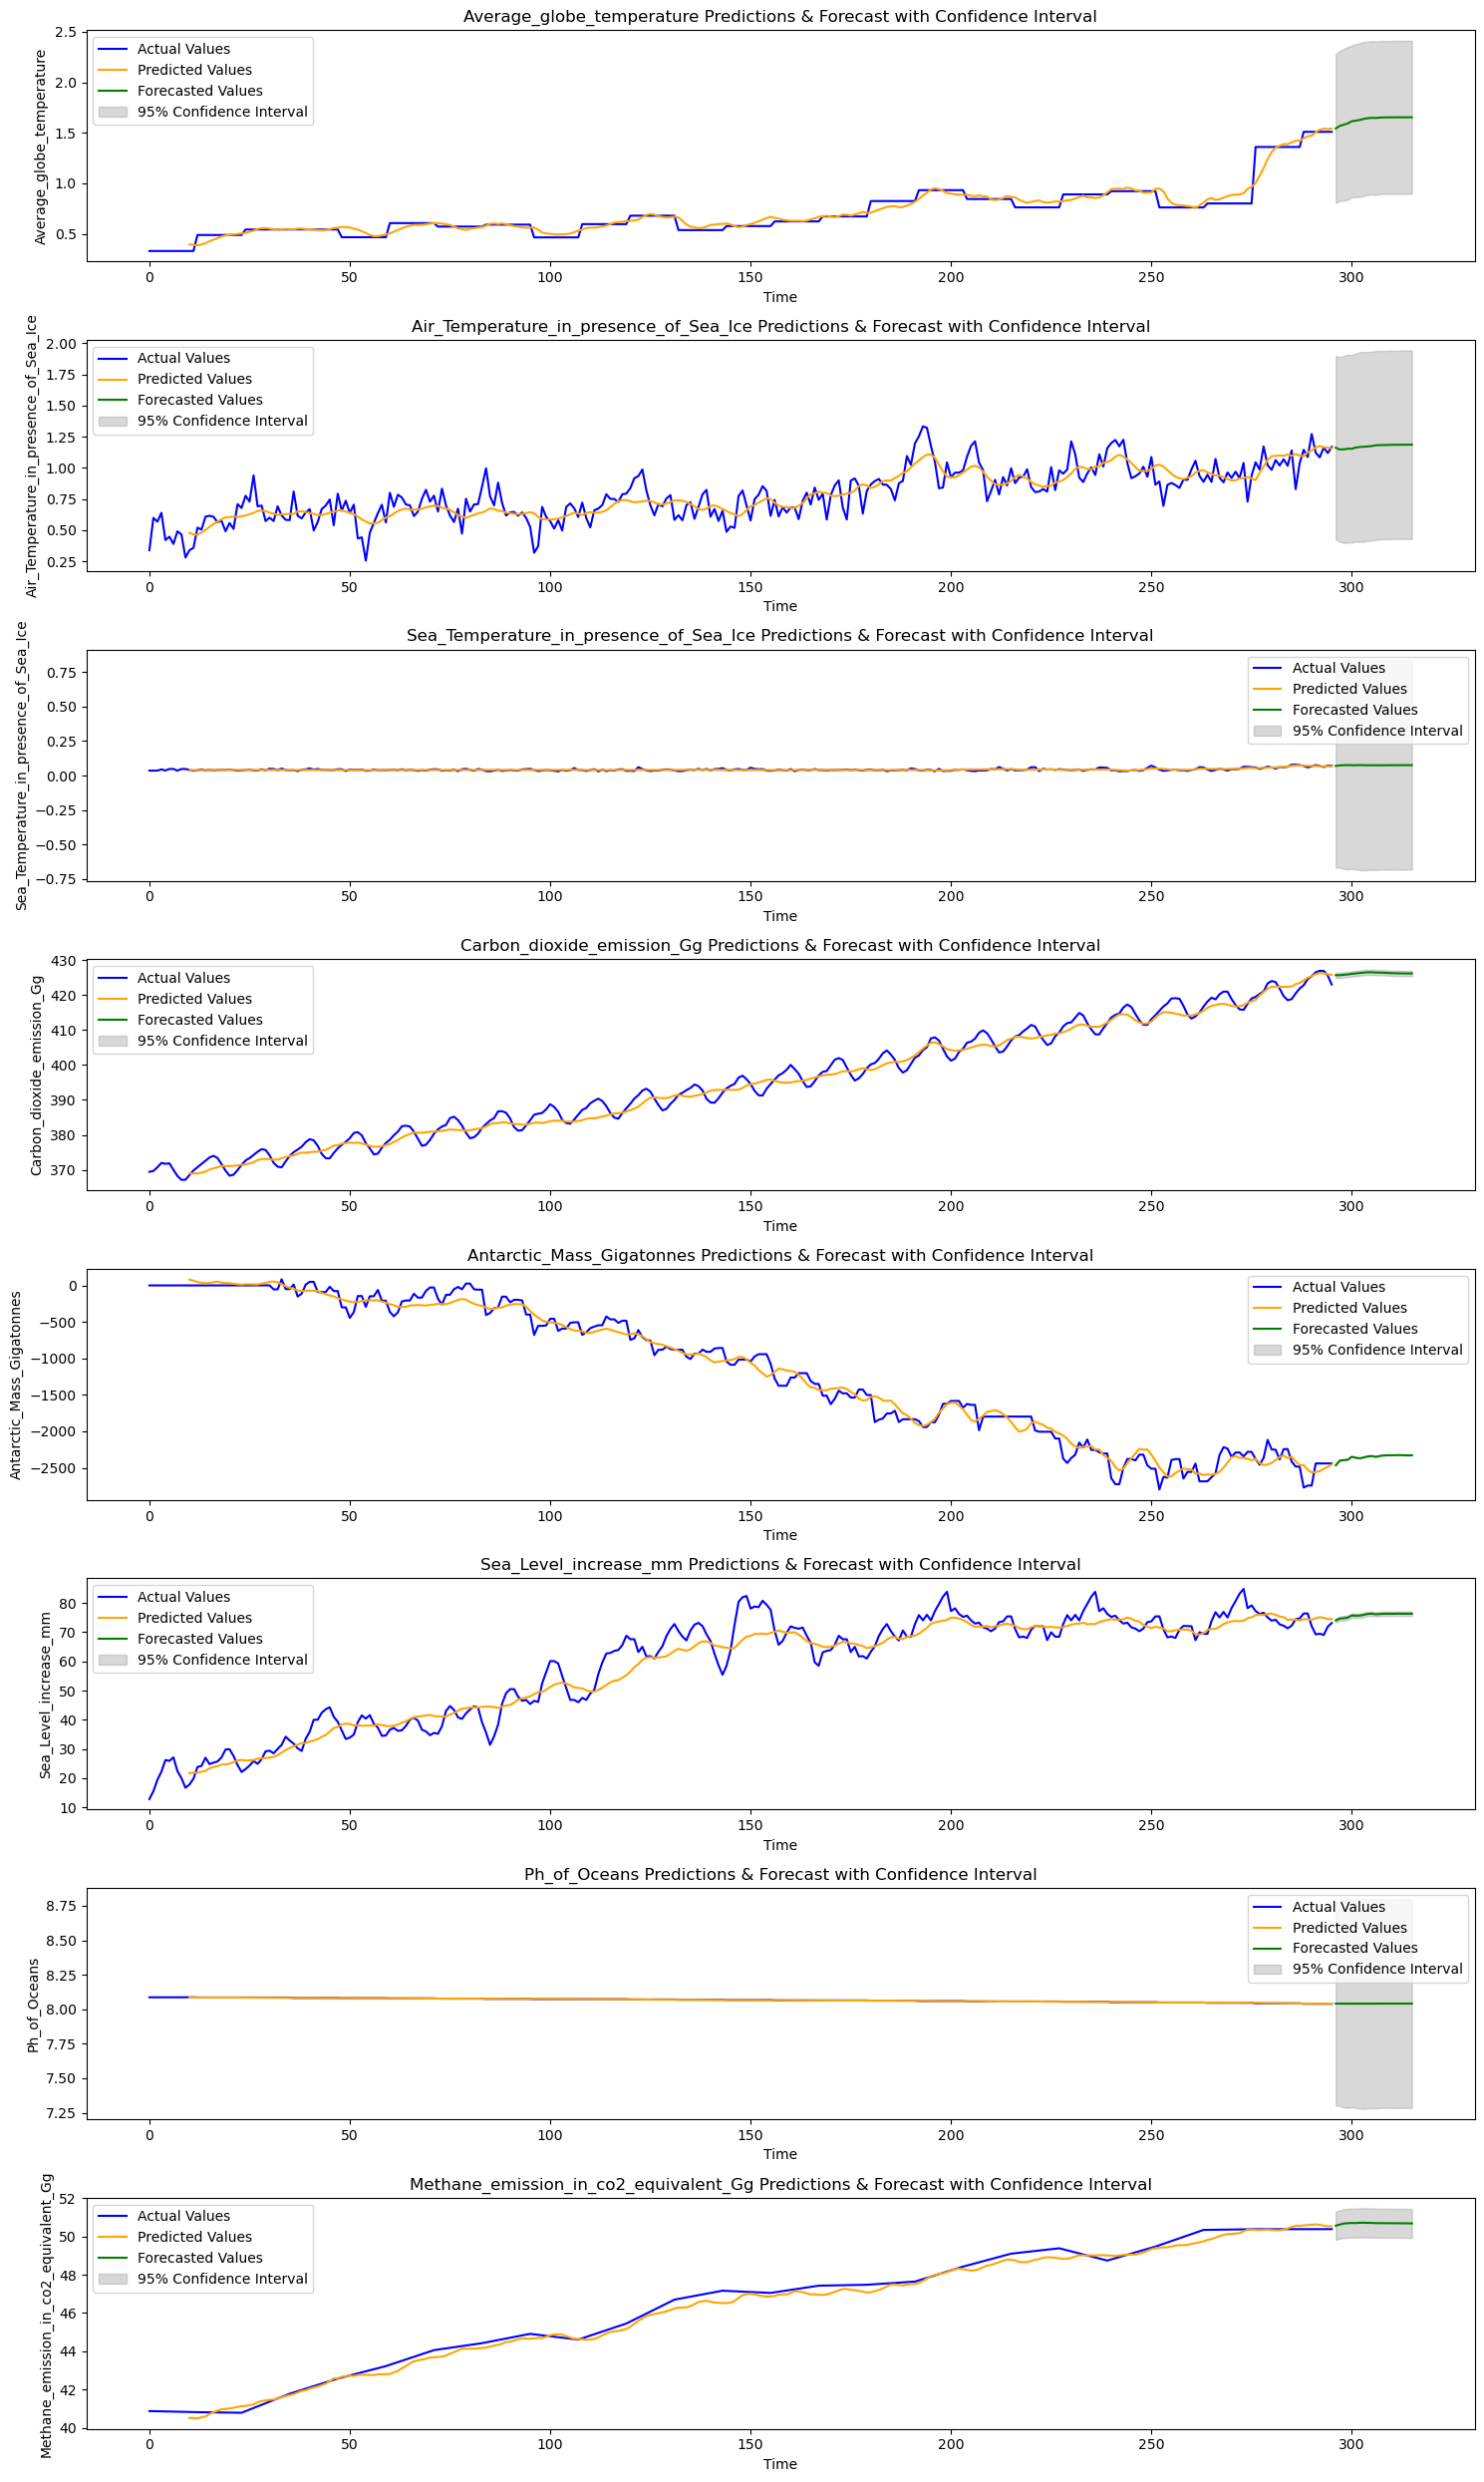

In [169]:
# Plot predictions and forecasted values along with confidence intervals
plt.figure(figsize=(15, 25))

for i, var in enumerate(features):
    plt.subplot(len(features), 1, i + 1)    
    # Plot actual past values
    plt.plot(data[:, i], label='Actual Values', color='blue')
    
    # Plot predicted past values
    plt.plot(np.arange(time_step, len(predictions) + time_step), predictions[:, i], label='Predicted Values', color='orange')
    
    # Plot forecasted future values
    forecast_range = np.arange(len(data), len(data) + future_steps)
    plt.plot(forecast_range, forecasted_values[:, i], label='Forecasted Values', color='green')
    
    # Calculate and plot confidence intervals for forecasted values
    lower_bounds = forecasted_values[:, i] - 1.96 * uncertainties[:, 0]  # 95% confidence interval
    upper_bounds = forecasted_values[:, i] + 1.96 * uncertainties[:, 0]
    plt.fill_between(forecast_range, lower_bounds, upper_bounds, color='gray', alpha=0.3, label='95% Confidence Interval')

    plt.title(f'{var} Predictions & Forecast with Confidence Interval')
    plt.xlabel('Time')
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()
